# Task 4.10 Part 1: Continued analysis of all merged data

# Table of Contents

# Part 1: Task 4.10 steps

## 01. Data frame review

## 02. Address security implications

## 03. Compare customer behavior across regions

## 04. Exclusion flag for low-activity customers

# Part 2: Variable profiling

## 05. Overall Department trends

## 03.b Return to regional profiling

## 06. Age profiling

## 07. Product price groups

## 08. Loyalty status

## 09. Top Products

## 10. Age and family status

## 11. Age and spending power

## 12. Age profiling continued

## 13. Family status profiling continued

## 14. Income profiling continued

## 15. Data frame summary

# Prepare environment

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [2]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path

path = r"C:\Users\leobs\OneDrive\Data Program\Achievement 4_Instacart\Instacart Basket Analysis"

In [8]:
# Import data frame

orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))

# 01. Review data frame

In [9]:
orders_products_all.shape

(32404859, 32)

In [10]:
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                object 
 2   order_number           int64  
 3   order_day_of_week      int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_label            object 
 14  busiest_day            object 
 15  busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int64  
 18  loyalty_flag           object 
 19  avg_spent              float64
 20  spending_flag          object 
 21  median_last_order      float64
 22  frequency_flag  

In [11]:
# Check import

orders_products_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,sex,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Observation: frequency flag appears inaccurate. Need to update flag for accuracy

In [12]:
# Check descriptive statistics for merged data frame

orders_products_all.describe()

,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spent,median_last_order,age,number_of_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


## Fix frequency flag 

In [13]:
orders_products_all.loc[:,['days_since_last_order', 'frequency_flag']].sample(n=25)

,days_since_last_order,frequency_flag
25967510,3.0,Frequent customer
8020079,6.0,Frequent customer
4213884,8.0,Frequent customer
25962196,30.0,Regular customer
21266682,30.0,Regular customer
26270248,7.0,Frequent customer
7093159,NaN,Frequent customer
58905,NaN,Frequent customer
4854590,2.0,Frequent customer
22826771,8.0,Frequent customer


Observations: confirmed error in frequency flag for all three categories. Will change to be as follows:

'Frequent customer' <10 days since last order 'Regular customer' >10 and <=20 days since last order 'Non-frequent customer' > 20 days since last order

I am also choosing to make NaN values 'New customer' since prior check revealed that is their value. To do this, I am converting all NaN to 0.

In [14]:
orders_products_all.loc[orders_products_all['days_since_last_order'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [15]:
orders_products_all.loc[(orders_products_all['days_since_last_order'] <=20) & (orders_products_all['days_since_last_order'] >10), 'frequency_flag'] = 'Regular customer'

In [16]:
orders_products_all.loc[orders_products_all['days_since_last_order'] <=10, 'frequency_flag'] = 'Frequent customer'

In [17]:
# Checking for Nan values

orders_products_all['days_since_last_order'].isnull().sum()

2076096

Note: previous analysis revealed that these are due to brand new customers. Decision to updating Nan values with 0 and adding additional frequency flag of 'New customer'

In [18]:
orders_products_all['days_since_last_order'] = orders_products_all['days_since_last_order'].fillna('0')

In [19]:
# Check for successful conversion

orders_products_all['days_since_last_order'].isnull().sum()

0

In [20]:
# Check random sample to see if frequency flag is updated and accurate

orders_products_all.loc[:,['days_since_last_order', 'frequency_flag']].sample(n=50)

,days_since_last_order,frequency_flag
28540724,18.0,Regular customer
6557053,7.0,Frequent customer
8142122,30.0,Non-frequent customer
14597561,3.0,Frequent customer
24367054,8.0,Frequent customer
19528801,6.0,Frequent customer
7186313,6.0,Frequent customer
367284,7.0,Frequent customer
3306894,1.0,Frequent customer
4289463,7.0,Frequent customer


In [21]:
orders_products_all['frequency_flag'].value_counts (dropna = False)

Frequent customer        19927029
Regular customer          6669825
Non-frequent customer     5808005
Name: frequency_flag, dtype: int64

In [22]:
# Summary stats for days since last order

orders_products_all['days_since_last_order'].describe()

count     32404859.0
unique          32.0
top              7.0
freq       3476198.0
Name: days_since_last_order, dtype: float64

# 02. Address security implications

Customers' first and last names are PII data. They will be dropped from the data set and are also irrelevant to the questions posed by stakeholders

In [23]:
orders_products_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'first_name',
       'last_name', 'sex', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [24]:
# Remove name columns

orders_products_all_no_names = orders_products_all.drop(columns = ['first_name', 'last_name'])

In [25]:
# Check for 2 name columns removed

orders_products_all_no_names.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

In [26]:
# Rename

ords_prods_all_nn = orders_products_all_no_names

# 03. Compare customer behavior across geographical regions

Note: used cited wikipedia article for defined regions, provided by client.

In [27]:
ords_prods_all_nn['state'].value_counts (dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [28]:
# Create new column for region 

result =[]

for value in ords_prods_all_nn['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')
    else:
        result.append('Unknown')

In [29]:
# Create new column from result output

ords_prods_all_nn['region'] = result

In [30]:
# Check accurate regional segmentation

ords_prods_all_nn['region'].value_counts (dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [31]:
# Check overall data frame

ords_prods_all_nn.head(20)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_last_order,frequency_flag,sex,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,0,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [32]:
# Create crosstab to match regions with spending habbits

crosstab_regional_spending = pd.crosstab(ords_prods_all_nn['region'], ords_prods_all_nn['spending_flag'], dropna = False)

In [33]:
crosstab_regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [34]:
test = crosstab_regional_spending.sort_values(['High spender'], ascending=[False])

In [35]:
test

spending_flag,High spender,Low spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [36]:
crosstab_regional_spending = test

In [37]:
crosstab_regional_spending.to_clipboard()

In [38]:
ords_prods_all_nn['spending_flag'].value_counts (dropna = False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

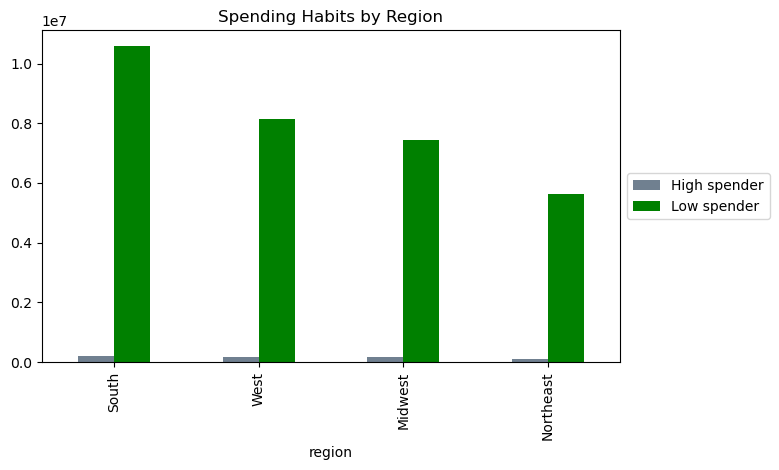

In [39]:
# Create bar chart to show regional spending differences

regional_spending_bar = crosstab_regional_spending.plot.bar(color= ['slategrey', 'green'])
plt.title('Spending Habits by Region')
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Observations: There does not appear to be significant differences in customer spending (particularly high vs. low spenders) across regions. The overall number of low spenders matches the overall number of customers in each region in order- South, West, Midwest, Northeast. There are not significant regional differences in high-spender counts.

In [40]:
# Export chart

regional_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Spending_by_region_bar_chart.png'), bbox_inches='tight')

# 04. Create an exclusion flag for low-activity customers

Low-activity customers are defined by stakeholders as customers with less than 5 orders. Request to export the sample as separate data set.

In [42]:
ords_prods_all_nn['max_order'].value_counts (dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: max_order, Length: 99, dtype: int64

In [43]:
# Create exclusion flag variable in new column based on 'max_order' value

ords_prods_all_nn.loc[ords_prods_all_nn['max_order']>= 5, 'customer_activity'] = 'High-activity customer'

In [44]:
ords_prods_all_nn.loc[ords_prods_all_nn['max_order']< 5, 'customer_activity'] = 'Low-activity customer'

In [45]:
# Check output

ords_prods_all_nn['customer_activity'].value_counts (dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: customer_activity, dtype: int64

In [46]:
#Create subset for low-activity customers

low_act_cust = ords_prods_all_nn[ords_prods_all_nn['customer_activity'] == 'Low-activity customer']

In [47]:
# Check subset

low_act_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,sex,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity
1510,520620,120,1,3,11,0,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
1512,520620,120,1,3,11,0,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
1514,520620,120,1,3,11,0,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer


In [48]:
low_act_cust.shape

(1440295, 32)

In [49]:
# Export

low_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [50]:
# Define high activity customer updated large data frame

high_act_cust = ords_prods_all_nn[ords_prods_all_nn['customer_activity'] == 'High-activity customer']

In [51]:
# Check updated data frame

high_act_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,sex,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity
0,2539329,1,1,2,8,0,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [52]:
high_act_cust.shape

(30964564, 32)

In [53]:
# Rename
active_cust = high_act_cust

# Part 2: Variable profiling
Identify trends on a customer level including usage frequency and expenditure, including aggregate measures.
Create a profiling variable based on age, income, certain goods in department_id, and number of dependants

Note: To complete this step, age, income, products, and number of dependants will need groupings.

In [55]:
#Review variables

active_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'region', 'customer_activity'],
      dtype='object')

In [56]:
# export progress

active_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_cust.pkl'))

## 05. Department profiling

In [57]:
# Import dataframe for departments, to be merged with final data frame for clarity

depart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [58]:
# Check import

depart

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
depart.shape

(21, 2)

In [60]:
# Rename Unnamed: 0

depart.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [61]:
# Check update

depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [62]:
# Check data type for merge

depart.dtypes

department_id     int64
department       object
dtype: object

In [63]:
#export data frame

depart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'depart.pkl'))

## Merge data frames to form final, instacart_all data frame

In [65]:
# Merge departments with active_customers to create final instacart dataframe

instacart_all=active_cust.merge(depart, on='department_id')

MemoryError: Unable to allocate 236. MiB for an array with shape (30964564,) and data type int64

Note: instacart_all will serve as the final data frame used for all final analysis

In [8]:
# Check new column and full dataframe output

instacart_all.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,sex,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity,department
0,2539329,1,1,2,8,0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer,beverages


In [9]:
# Check shape

instacart_all.shape

(30964564, 33)

In [10]:
# Department value counts

instacart_all['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Text(55.847222222222214, 0.5, 'Count of Orders')

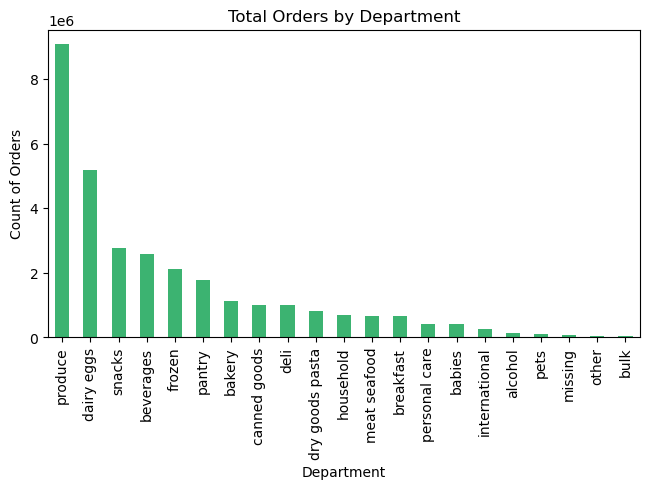

In [11]:
# Create bar chart of department orders

department_bar_chart = instacart_all['department'].value_counts().plot.bar(color='mediumseagreen')

plt.title('Total Orders by Department')
plt.tight_layout()
plt.xlabel('Department')
plt.ylabel('Count of Orders')

Produce, dairy eggs, snacks, beverages, and frozen are the top 5 departments. Produce and daiy eggs have drastically more orders. Focusing on these departments could help with sales. Examining customer demographics by department could help target advertising.

In [12]:
# Export bar chart

department_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar_chart.png'),bbox_inches='tight')

In [13]:
# Create crosstab of department data

crosstab_departments = instacart_all.groupby('department').agg({'order_id':['count'], 'prices':['mean', 'sum']})

In [14]:
crosstab_departments

order_id     prices            
                   count       mean         sum
department                                     
alcohol           144627   8.150699   1178811.1
babies            410392   7.634399   3133096.4
bakery           1120828   7.857482   8806886.2
beverages        2571901   7.682556  19758773.9
breakfast         670850   8.031647   5388030.2
bulk               33451   8.346919    279212.8
canned goods     1012074   7.546660   7637778.5
dairy eggs       5177182   8.336372  43118260.7
deli             1003834   7.783347   7813188.1
dry goods pasta   822136   7.349370   6042181.4
frozen           2121731   7.733725  16408884.0
household         699857   7.379951   5164910.3
international     255991   7.678797   1965702.9
meat seafood      674781  16.300034  10998953.4
missing            64768   8.660655    560933.3
other              34411   6.961995    239569.2
pantry           1782705   8.014482  14287456.5
personal care     424306   7.998744   3393915.0
pets               93060   7.887489    734009.7
produce          9079273   7.980348  72455761.7
snacks           2766406   4.275555  11827920.3

In [15]:
crosstab_departments.to_clipboard()

In [16]:
# Create variable for top departments, which are top number of orders and/or top revenue

top = []

for value in instacart_all['department']:
    if value in ['produce','dairy eggs','snacks','beverages','frozen','pantry','meat seafood']:
        top.append ('Top-department')
    else: 
        top.append('Regular-department')

In [17]:
# Define new column variable

instacart_all['top_depart'] = top

In [18]:
#Check output

instacart_all['top_depart'].value_counts (dropna = False)

Top-department        24173979
Regular-department     6790585
Name: top_depart, dtype: int64

Note: top_depart and department data from above can be used to create groupings and explore relationships across customer demographics, completed below. Next step is to complete groupings based on demographics

In [19]:
# export progress of data frame

instacart_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_all.pkl'))

# 03.b Return to regional profiling with instacart_all

Note: all regional calculations below are done with the instacart_all data frame (after merge and with exclusions for non active customers)

In [ ]:
# Regional summary stats

crosstab_regional_stats = instacart_all.groupby('region').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)


In [ ]:
# Find count of orders by region

crosstab_regional_stats = crosstab_regional_stats.sort_values([('order_id', 'count')], ascending = [False])

In [ ]:
crosstab_regional_stats

In [ ]:
crosstab_regional_stats.to_clipboard()

In [ ]:
#Isolate southern regional trends due to highest order count

# Explore popular departments for the southern region

southern_depart_sub = instacart_all[instacart_all['region'] == 'South']


In [ ]:
# Check subset

southern_depart_sub.head()


In [ ]:
# Crosstab department

crosstab_south_dep = southern_depart_sub.groupby('department')['order_number'].count().nlargest(5)


In [ ]:
# Check accuracy

crosstab_south_dep.head()


In [ ]:
crosstab_south_dep.to_clipboard()

In [ ]:
# Create bar chart of most popular departments in the South

south_depart_bar = southern_depart_sub.groupby('department')['order_number'].count().nlargest(5).plot.bar (color =  'seagreen')
                                                                                 
plt.title('Top Southern Departments')
plt.tight_layout()
plt.xlabel('Department')
plt.ylabel('Count of Orders')


Observations: The South follows overall trends with produce being the top regional department.

In [ ]:
# Export chart

south_depart_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'south_depart_bar.png'),bbox_inches='tight')


# 06. Age profiling

In [21]:
instacart_all['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

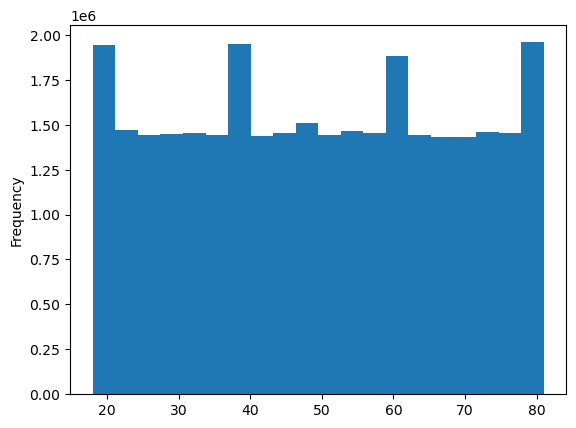

In [22]:
# Create histogram showing age distribution

age_distrib = instacart_all['age'].plot.hist(bins = 20)

In [23]:
age_distrib.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_distrib_hist.png'))

In [24]:
# Create age group categories to explore patterns, using quartiles to define groups

instacart_all.loc[instacart_all['age'] <33, 'age_group_loc'] = 'Young adult'

In [25]:
instacart_all.loc[(instacart_all['age'] >= 33) & (instacart_all['age'] < 65), 'age_group_loc'] = 'Middle-aged adult'

In [26]:
instacart_all.loc[instacart_all['age'] >= 65, 'age_group_loc'] = 'Older adult'

In [27]:
instacart_all['age_group_loc'].value_counts (dropna = False)

Middle-aged adult    15483886
Older adult           8195544
Young adult           7285134
Name: age_group_loc, dtype: int64

In [28]:
instacart_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity,department,top_depart,age_group_loc
0,2539329,1,1,2,8,0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult


In [29]:
# Rename column

instacart_all.rename(columns = {'age_group_loc': 'age_group'}, inplace = True)

Text(42.597222222222214, 0.5, 'Count')

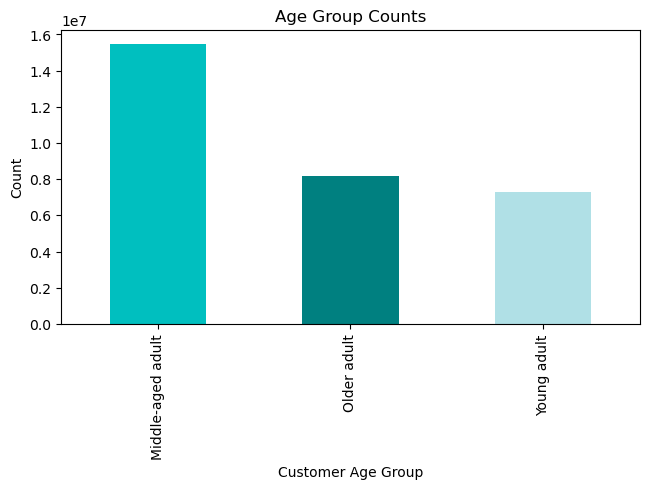

In [30]:
# Create bar chart to show age group distribution

age_group_distr_bar = instacart_all['age_group'].value_counts().plot.bar(color=['c', 'teal', 'powderblue'])
plt.title('Age Group Counts')
plt.tight_layout()
plt.xlabel('Customer Age Group')
plt.ylabel('Count')

Observations: Middle-aged adults make the most orders, while Older adults and Young adults make similar amounts of orders to each other

In [31]:
age_group_distr_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distr_bar.png'))

In [32]:
# Check relationship between age and day of the week

crosstab_age_dow = pd.crosstab(instacart_all['order_day_of_week'], instacart_all['age_group'], dropna = False)

In [33]:
crosstab_age_dow

age_group,Middle-aged adult,Older adult,Young adult
order_day_of_week,,,
0,2947868,1566244,1394498
1,2705698,1417495,1288493
2,2018191,1065170,941345
3,1832995,978350,858190
4,1815408,956161,853425
5,2019820,1066115,947794
6,2143906,1146009,1001389


In [34]:
crosstab_age_dow.to_clipboard()

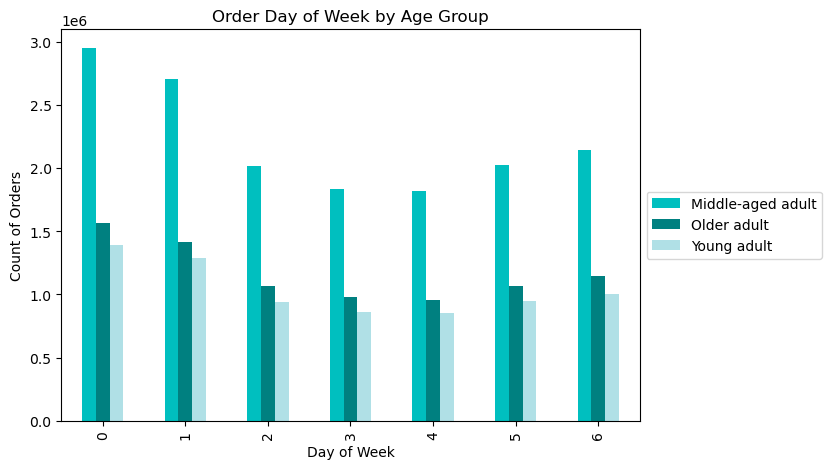

In [35]:
age_dow_bar = crosstab_age_dow.plot.bar(color=['c', 'teal', 'powderblue'])

plt.title('Order Day of Week by Age Group')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Observations: All three age groups make the most orders on Sundays and Mondays, therefore there are no differences in age across most popular ordering days based on relative overall orders

In [36]:
# Export chart

age_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_day_of_week.png'),bbox_inches='tight')

In [37]:
#Crosstab showing age group orders by time of day

crosstab_age_hour_of_day = pd.crosstab(instacart_all['order_hour_of_day'], instacart_all['age_group'], dropna = False)

In [38]:
crosstab_age_hour_of_day

age_group,Middle-aged adult,Older adult,Young adult
order_hour_of_day,,,
0,104418,53395,50229
1,54667,28688,26266
2,31898,17458,16335
3,23573,13395,11828
4,24943,13680,12140
5,41175,23286,19957
6,137395,75229,68389
7,428049,233067,202097
8,830548,441458,387104


# 07. Product pricing

Observations: The majority of products are mid-range products, making up more than low-range and high-range products combined.

In [39]:
instacart_all['top_depart'].value_counts (dropna = False)

Top-department        24173979
Regular-department     6790585
Name: top_depart, dtype: int64

In [40]:
instacart_all['price_label'].value_counts (dropna = False)

Not enough data       20164567
Low-range product      9674840
Mid-range product       727204
High-range product      397953
Name: price_label, dtype: int64

In [41]:
instacart_all.loc[:,['prices', 'price_label']].sample(n=25)

,prices,price_label
20228986,5.4,Not enough data
16830867,6.7,Not enough data
29465219,4.2,Low-range product
22770769,4.2,Low-range product
29137959,5.4,Not enough data
11928055,6.7,Not enough data
27439760,9.4,Not enough data
9725806,6.1,Not enough data
19523398,6.9,Not enough data
8311578,5.1,Not enough data


Note: need to correct price_label due to inaccuracies noted above. 

Will update to meet the following conditions:

prices >=15 = 'High-range product' 
prices <=5 & <15 = 'Mid-range product'
prices < 5 = 'Low-range product'

## Correction to previous price labels

In [42]:
instacart_all.loc[instacart_all['prices'] >=15, 'price_label'] = 'High-range product'

In [43]:
instacart_all.loc[(instacart_all['prices'] <15) & (instacart_all['prices'] >=5), 'price_label'] = 'Mid-range product'

In [44]:
instacart_all.loc[instacart_all['prices'] <5, 'price_label'] = 'Low-range product'

In [45]:
instacart_all['price_label'].value_counts (dropna = False)

Mid-range product     21014552
Low-range product      9459067
High-range product      490945
Name: price_label, dtype: int64

Successful update. Now will update price_label chart

## Price label counts, updated

Text(33.722222222222214, 0.5, 'Count of Orders')

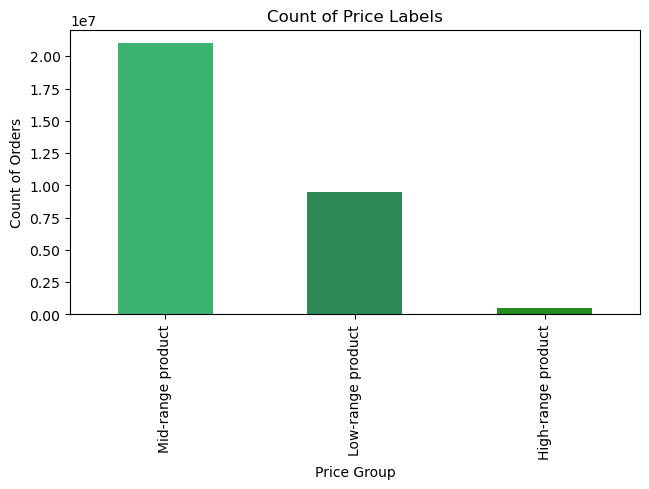

In [46]:
price_label_bar = instacart_all['price_label'].value_counts().plot.bar (color = ['mediumseagreen', 'seagreen', 'forestgreen'])
                                                                                 
plt.title('Count of Price Labels')
plt.tight_layout()
plt.xlabel('Price Group')
plt.ylabel('Count of Orders')

Observations: The majority of products are mid-range products, making up more than low-range and high-range products combined.

In [47]:
# Export figure

price_label_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_label_bar.png'),bbox_inches='tight')

## Price labels and department relationship

In [48]:
crosstab_depart_price_label = pd.crosstab(instacart_all['price_label'], instacart_all['department'], dropna = False)

In [49]:
crosstab_depart_price_label

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
price_label,,,,,,,,,,,,,,,,,,,,,
High-range product,1126,1165,5850,3096,0,0,2930,17722,1565,10712,...,3153,1784,393410,166,84,3062,446,128,31589,0
Low-range product,31790,114716,274442,804477,203292,366,260413,1350870,290051,280567,...,239946,72598,0,18099,15001,482016,121492,27443,2551102,1688056
Mid-range product,111711,294511,840536,1764328,467558,33085,748731,3808590,712218,530857,...,456758,181609,281371,46503,19326,1297627,302368,65489,6496582,1078350


In [50]:
crosstab_depart_price_label_2 = pd.crosstab(instacart_all['top_depart'], instacart_all['price_label'], dropna = False)

In [51]:
crosstab_depart_price_label_2

price_label,High-range product,Low-range product,Mid-range product
top_depart,,,
Regular-department,29109,1950216,4811260
Top-department,461836,7508851,16203292


In [52]:
#sort specific column

crosstab_sorted = crosstab_depart_price_label_2.sort_values(['High-range product'], ascending=False)

In [53]:
crosstab_sorted

price_label,High-range product,Low-range product,Mid-range product
top_depart,,,
Top-department,461836,7508851,16203292
Regular-department,29109,1950216,4811260


In [54]:
crosstab_sorted.to_clipboard()

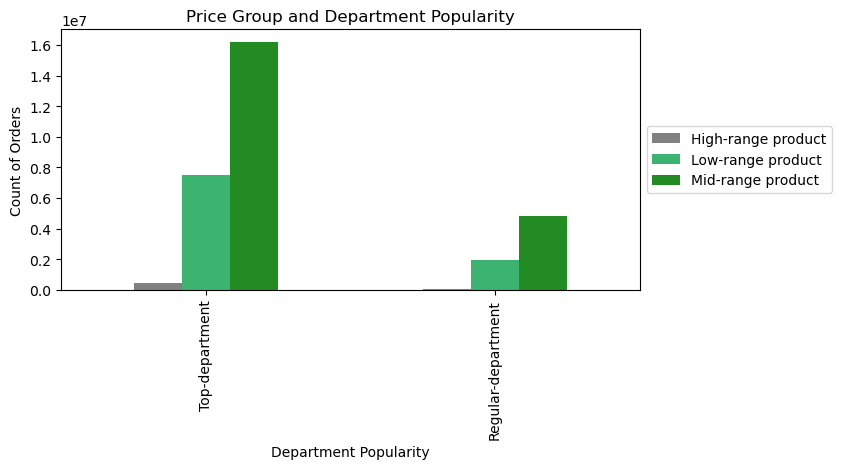

In [55]:
# Create bar chart to show price range differences between top and regular departments

depar_price_label_bar = crosstab_sorted.plot.bar(color= ['gray', 'mediumseagreen', 'forestgreen'])
plt.title('Price Group and Department Popularity')
plt.tight_layout()
plt.xlabel('Department Popularity')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [56]:
# Export figure
depar_price_label_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'depart_price_label_bar.png'),bbox_inches='tight')

# Create small sample df to use for all line plots

In [ ]:
# Create sample for line plot data

np.random.seed(4)
dev = np.random.rand(len(instacart_all)) <=.7

In [ ]:
insta_small = instacart_all[~dev]

In [ ]:
# Check sample

insta_small.shape

Accurate small sample size based on row count.

In [ ]:
insta_small.head()

In [120]:
# Export small sample df to use in future plots

insta_small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_small.pkl'))

# 08. Loyalty status and ordering habbits

In [57]:
instacart_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'region', 'customer_activity', 'department', 'top_depart',
       'age_group'],
      dtype='object')

In [59]:
loyalty_counts = instacart_all.groupby('loyalty_flag')['order_number'].count()

In [60]:
loyalty_counts

loyalty_flag
Loyal customer      10284093
New customer         4803695
Regular customer    15876776
Name: order_number, dtype: int64

Text(42.597222222222214, 0.5, 'Count of Orders')

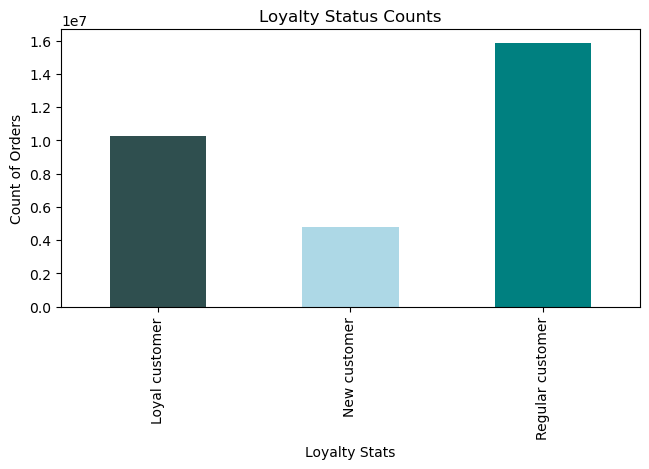

In [61]:
# Create a bar chart to show counts in loyalty status

loyalty_count_bar = loyalty_counts.plot.bar(color= ['darkslategray', 'lightblue', 'teal'])
plt.title('Loyalty Status Counts')
plt.tight_layout()
plt.xlabel('Loyalty Stats')
plt.ylabel('Count of Orders')

In [62]:
# Export figure

loyalty_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_count_bar.png'),bbox_inches='tight')

In [63]:
crosstab_loyalty_counts = instacart_all.groupby('loyalty_flag').agg({'order_number':['count']})

In [64]:
crosstab_loyalty_counts

,order_number
,count
loyalty_flag,
Loyal customer,10284093
New customer,4803695
Regular customer,15876776


In [65]:
crosstab_loyalty_counts.to_clipboard()

In [66]:
# Find trends in loyalty status across departments

crosstab_loyalty_depart = pd.crosstab(instacart_all['department'], instacart_all['loyalty_flag'], dropna = False)

In [67]:
crosstab_loyalty_depart

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


In [68]:
crosstab_loyalty_counts = instacart_all.groupby('loyalty_flag').agg({'order_number':['count']})

In [69]:
crosstab_loyalty_counts

,order_number
,count
loyalty_flag,
Loyal customer,10284093
New customer,4803695
Regular customer,15876776


In [70]:
# Check data types for accurate aggregation potential

instacart_all.dtypes

order_id                   int64
user_id                   object
order_number               int64
order_day_of_week          int64
order_hour_of_day          int64
days_since_last_order     object
product_id                 int64
add_to_cart_order          int64
reordered                  int64
product_name              object
aisle_id                   int64
department_id              int64
prices                   float64
price_label               object
busiest_day               object
busiest_days              object
busiest_period_of_day     object
max_order                  int64
loyalty_flag              object
avg_spent                float64
spending_flag             object
median_last_order        float64
frequency_flag            object
sex                       object
state                     object
age                        int64
date_joined               object
number_of_dependants       int64
marital_status            object
income                     int64
region    

In [71]:
# Descriptive stats of loyalty groups

crosstab_loyalty_counts_stats = instacart_all.groupby('loyalty_flag').agg({'order_id': ['count'], 'prices': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median']}, dropna = False)

In [72]:
crosstab_loyalty_counts_stats

order_id prices                 order_day_of_week  \
                     count    min      mean   max            median   
loyalty_flag                                                          
Loyal customer    10284093    1.0  7.773575  25.0               3.0   
New customer       4803695    1.0  7.801665  25.0               2.0   
Regular customer  15876776    1.0  7.798262  25.0               2.0   

                 order_hour_of_day  
                            median  
loyalty_flag                        
Loyal customer                13.0  
New customer                  14.0  
Regular customer              13.0

Observations: All three loyalty groups have similar mean prices and have the most orders at 13:00 and 14:00. All three loyalty groups buy the most Mid-range products, folowed by Low-range then High-range products. 

In [73]:
crosstab_loyalty_counts_stats.to_clipboard()

In [74]:
#Crosstab of loyalty groups and item price groups

crosstab_loyalty_counts_price_group = pd.crosstab(instacart_all['loyalty_flag'], instacart_all['price_label'], dropna = False)

In [75]:
crosstab_loyalty_counts_price_group

price_label,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,151323,3144148,6988622
New customer,80472,1467234,3255989
Regular customer,259150,4847685,10769941


In [76]:
crosstab_loyalty_counts_price_group.to_clipboard()

In [77]:
crosstab_loyalty_counts_price_group = crosstab_loyalty_counts_price_group.sort_values(['loyalty_flag'], ascending=False)

In [78]:
crosstab_loyalty_counts_price_group

price_label,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Regular customer,259150,4847685,10769941
New customer,80472,1467234,3255989
Loyal customer,151323,3144148,6988622


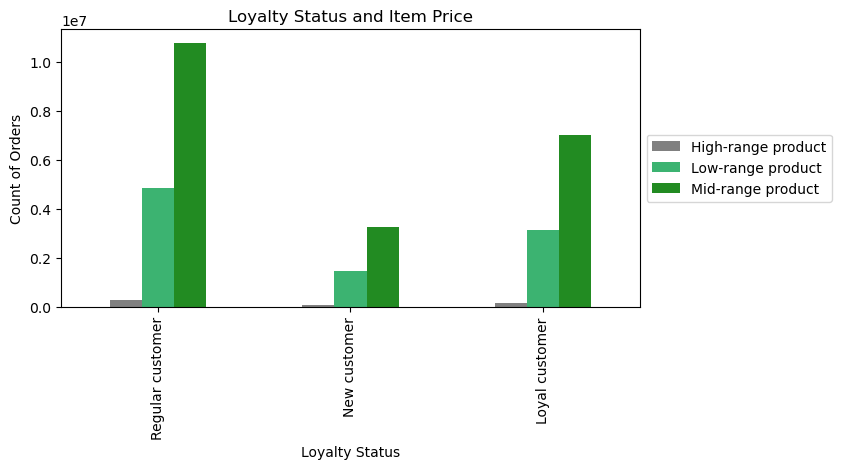

In [79]:
# Create a bar chart to show price labels and loyalty status

loyalty_price_label_bar = crosstab_loyalty_counts_price_group.plot.bar(color= ['gray','mediumseagreen','forestgreen'])
plt.title('Loyalty Status and Item Price')
plt.tight_layout()
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

All three loyalty groups buy the most Mid-range products, folowed by Low-range then High-range products.

In [80]:
# Export figure

loyalty_price_label_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_label_bar.png'),bbox_inches='tight')

## Loyalty counts 

Note: Below analysis uses the full data frame and updates to match formatting of other charts.

In [81]:
loyalty_flag_counts = instacart_all.groupby('loyalty_flag')['order_number'].count()

In [82]:
loyalty_flag_counts

loyalty_flag
Loyal customer      10284093
New customer         4803695
Regular customer    15876776
Name: order_number, dtype: int64

In [83]:
loyalty_flag_counts = loyalty_flag_counts.sort_index(axis=0, ascending = True)

In [84]:
loyalty_flag_counts

loyalty_flag
Loyal customer      10284093
New customer         4803695
Regular customer    15876776
Name: order_number, dtype: int64

In [85]:
loyalty_counts = instacart_all.groupby('loyalty_flag').agg({'order_id': ['count']}, dropna = False)

In [86]:
loyalty_counts

,order_id
,count
loyalty_flag,
Loyal customer,10284093
New customer,4803695
Regular customer,15876776


In [87]:
loyalty_counts_again = instacart_all.groupby('loyalty_flag')['order_number'].count()

In [88]:
loyalty_counts_again

loyalty_flag
Loyal customer      10284093
New customer         4803695
Regular customer    15876776
Name: order_number, dtype: int64

In [89]:
loyalty_counts_again= loyalty_counts_again.sort_index(axis=0, ascending = False)

In [90]:
loyalty_counts_again

loyalty_flag
Regular customer    15876776
New customer         4803695
Loyal customer      10284093
Name: order_number, dtype: int64

In [91]:
# Change data type to allow for summary stats

instacart_all['days_since_last_order'] = instacart_all['days_since_last_order'].astype('int64')

Text(42.597222222222214, 0.5, 'Count of Orders')

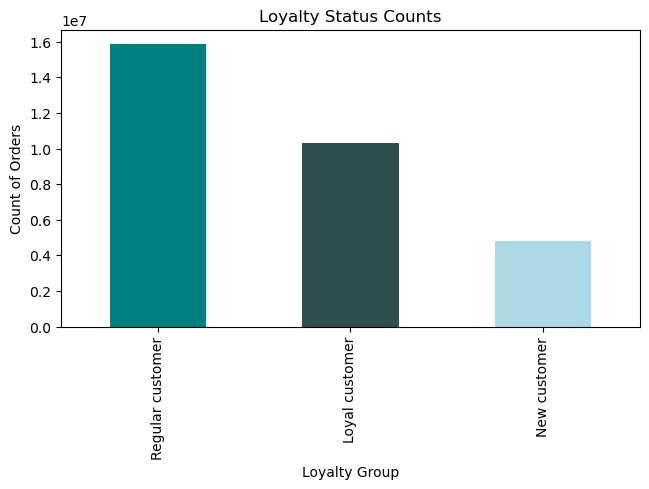

In [92]:
# Create loyalty counts chart

loyalty_counts_bar_final = instacart_all['loyalty_flag'].value_counts().plot.bar(color= ['teal', 'darkslategray', 'lightblue'])
plt.title('Loyalty Status Counts')
plt.tight_layout()
plt.xlabel('Loyalty Group')
plt.ylabel('Count of Orders')

Observations: Regular customers make the most orders. Loyal customers who have the longest time since first order make less orders than regular customers and more orders than new customers. Regular customers make over twice as many orders as new customers.

In [93]:
loyalty_counts_bar_final.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_counts_bar_final.png'),bbox_inches='tight')

In [94]:
# other direction loyalty flag

crosstab_loyalty_counts_price_group2 = pd.crosstab(instacart_all['price_label'], instacart_all['loyalty_flag'], dropna = False)

In [95]:
crosstab_loyalty_counts_price_group2

loyalty_flag,Loyal customer,New customer,Regular customer
price_label,,,
High-range product,151323,80472,259150
Low-range product,3144148,1467234,4847685
Mid-range product,6988622,3255989,10769941


In [96]:
crosstab_loyalty_counts_price_group2.sort_values(['price_label'], ascending= False)

loyalty_flag,Loyal customer,New customer,Regular customer
price_label,,,
Mid-range product,6988622,3255989,10769941
Low-range product,3144148,1467234,4847685
High-range product,151323,80472,259150


In [97]:
crosstab_loyalty_counts_price_group2.to_clipboard()

## Loyalty status and price labels

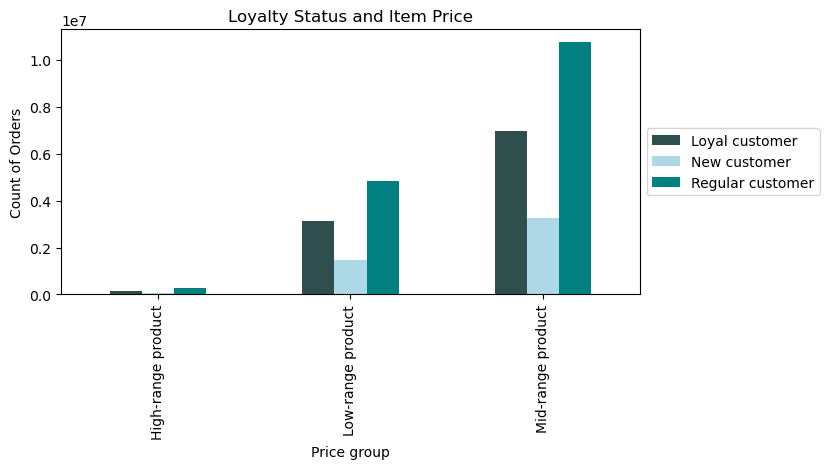

In [98]:
# Create a bar chart to show loyalty status and price labels

loyalty_price_label_bar2 = crosstab_loyalty_counts_price_group2.plot.bar(color= ['darkslategray', 'lightblue', 'teal'])
plt.title('Loyalty Status and Item Price')
plt.tight_layout()
plt.xlabel('Price group')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [99]:
loyalty_price_label_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_label_bar2.png'),bbox_inches='tight')

## Loyalty and day of week

In [100]:
loyalty_day_of_week = pd.crosstab(instacart_all['order_day_of_week'], instacart_all['loyalty_flag'], dropna = False)

In [101]:
loyalty_day_of_week

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


In [102]:
loyalty_day_of_week.to_clipboard()

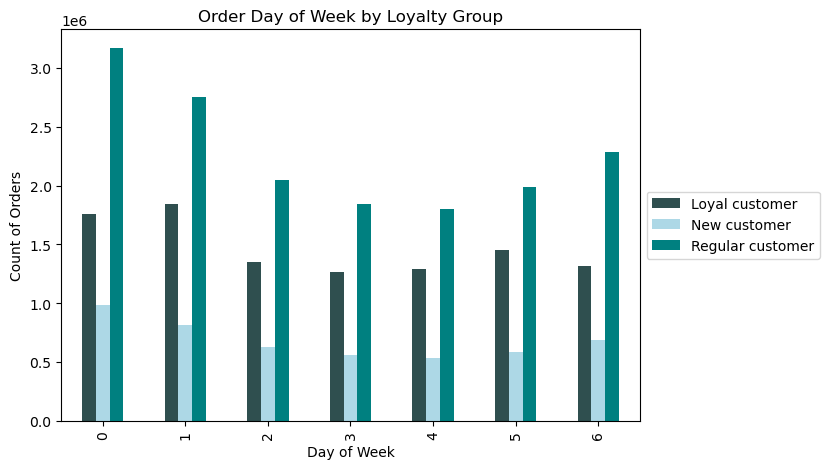

In [103]:
loyalty_day_of_week_bar = loyalty_day_of_week.plot.bar(color= ['darkslategray', 'lightblue', 'teal'])
plt.title('Order Day of Week by Loyalty Group')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

All three loyalty groups follow similar order numbers throughout the week. Orders peak on Sunday and Monday and decrease until Wednesday and Thursday.  Loyal customers make the most orders (18%) on Monday, New customers make the most ordesr (21%) on Sunday, and Regular customers make the most orders (20%) on Sunday. All three groups have 12% of their orders on Wednesday. Loyal customers show the least variation in order numbers across day of the week. 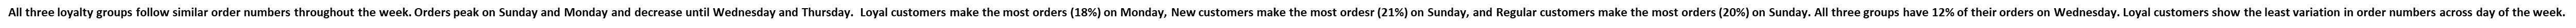

In [104]:
# Export figure

loyalty_day_of_week_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_day_of_week_bar.png'),bbox_inches='tight')

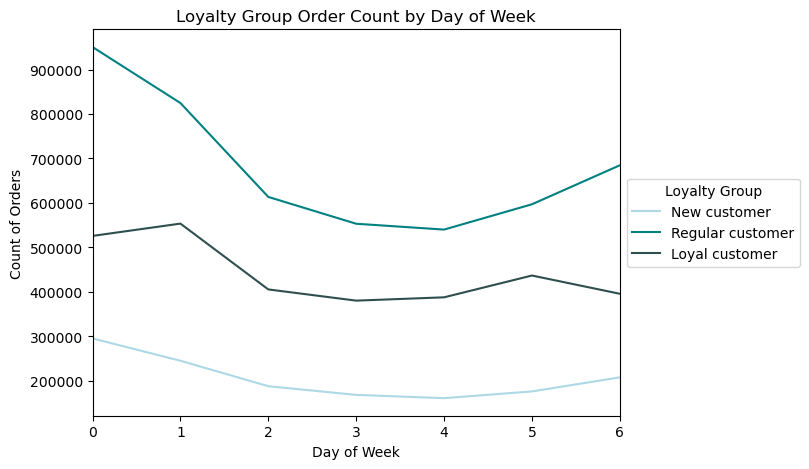

In [82]:
# Create line plot that shows customer loyalty by day of week

loyalty_day_of_week_line = sns.lineplot(data= insta_small, x='order_day_of_week', y='order_id', estimator='count', hue='loyalty_flag', palette =['lightblue', 'teal', 'darkslategray'], errorbar=None)

plt.title('Loyalty Group Order Count by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.xlim(xmin=0, xmax=6)
plt.locator_params('x', nbins= 7)
plt.ylabel('Count of Orders')
plt.legend(title='Loyalty Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

In addition to above observations, Loyal customers show spikes in orders on Sunday and Thursday. 

In [83]:
# Export figure

loyalty_day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_day_of_week_line.png'),bbox_inches='tight')

## Loyalty and hour of day

In [105]:
# Examine loyalty status and time of day

loyalty_hour_of_day = pd.crosstab(instacart_all['order_hour_of_day'], instacart_all['loyalty_flag'], dropna = False)

In [106]:
loyalty_hour_of_day

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


In [107]:
loyalty_hour_of_day.to_clipboard()

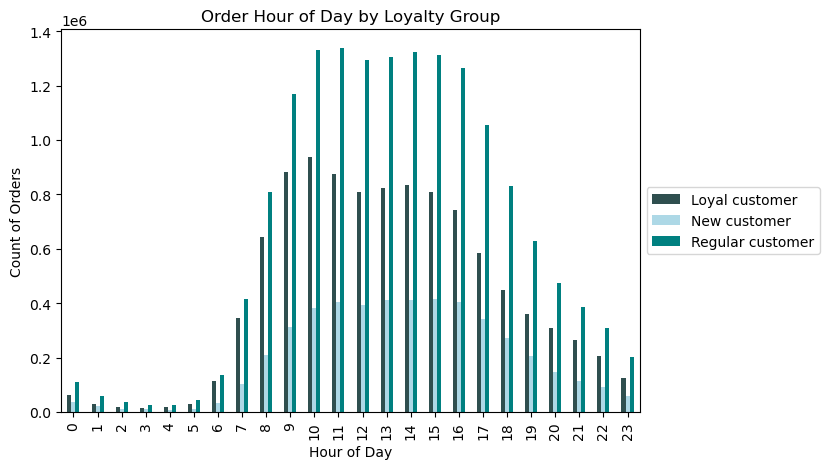

In [108]:
#Create bar chart for loyalty and hour of day

loyalty_hour_of_day_bar = loyalty_hour_of_day.plot.bar(color= ['darkslategray', 'lightblue', 'teal'])
plt.title('Order Hour of Day by Loyalty Group')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Observations: All three loyalty groups follow similar ordering patterns across time of day, with a peak range between 9am and 5pm. The least number of orders across all loyalty groups are between 1am and 5am. 

In [109]:
# Export figure

loyalty_hour_of_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_hour_of_day_bar.png'),bbox_inches='tight')

In [33]:
loyalty_hour_of_day_small_crosstab = pd.crosstab(insta_small['order_hour_of_day'], insta_small['loyalty_flag'], dropna = False)

In [34]:
loyalty_hour_of_day_small_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,18682,10467,32849
1,8975,6204,17623
2,5342,3579,10660
3,4082,2775,7841
4,5086,2475,7486
5,8847,3728,12762
6,33808,9981,40256
7,103756,30701,124608
8,192624,62251,241488


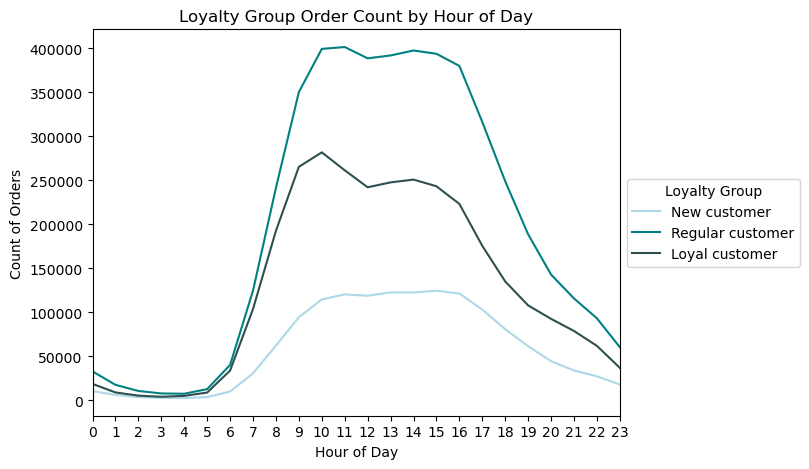

In [80]:
# Create line plot that shows customer loyalty by hour of day

loyalty_hour_of_day_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='order_id', estimator='count', hue='loyalty_flag', palette =['lightblue', 'teal', 'darkslategray'], errorbar=None)

plt.title('Loyalty Group Order Count by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Count of Orders')
plt.legend(title='Loyalty Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: This lineplot shows an additional trend that New customers platteau throughout the busiest hours, while Regular and Loyal customers dip between 10 am and 12pm.

In [81]:
# Export figure

loyalty_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_hour_of_day_line.png'),bbox_inches='tight')

## Loyalty count expenditure

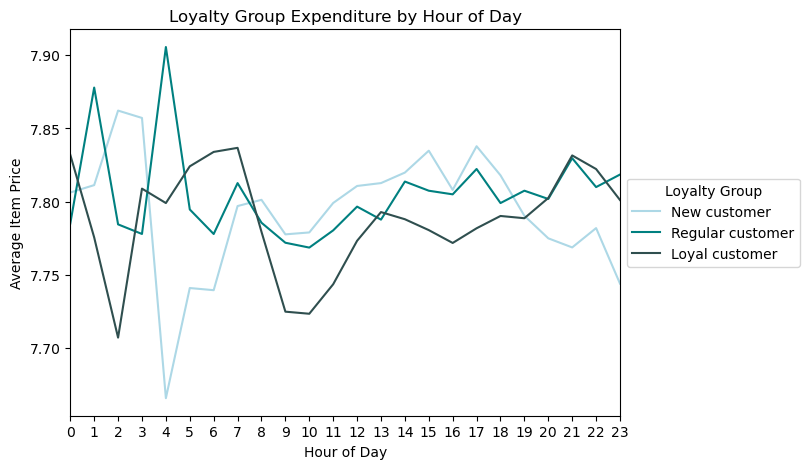

In [150]:
# Create line plot that shows customer loyalty expenditure by hour of day

loyalty_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='loyalty_flag', palette =['lightblue', 'teal', 'darkslategray'], errorbar=None)

plt.title('Loyalty Group Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(title='Loyalty Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: Average item prices are volatile across hour of day based on loyalty groups. There are differences in expenditure based on loyalty group.

New customers have the highest expenditure at 2am and between 3and 5pm. They have the lowest average item price at 4am.
Regular customers have the highest expenditure at 1am and at 4am. They have the lowest average item price around 10am.
Loyal customers have the highest expenditure at 7am and 9pm. They have the lowest average price at 2am and between 9am and 10am.

In [151]:
# Export figure

loyalty_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_expenditure_line.png'),bbox_inches='tight')

## Explore intersection of brand loyalty across regions

In [51]:
# Crosstab of loyalty counts and regions

region_loyalty = pd.crosstab(instacart_all['region'], instacart_all['loyalty_flag'], dropna = False)

In [52]:
region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


In [53]:
regional_loyalty = region_loyalty.sort_values(['Loyal customer'], ascending = False)

In [54]:
regional_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
South,3405844,1593664,5311631
West,2662690,1231114,4033423
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744


In [55]:
regional_loyalty.to_clipboard()

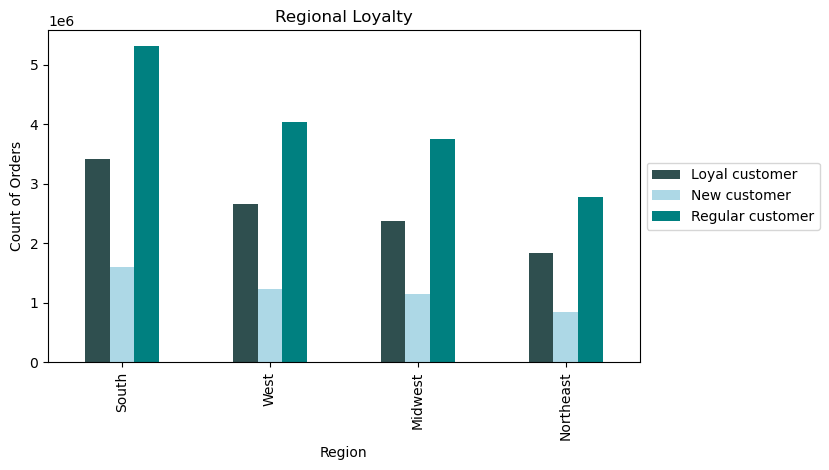

In [114]:
#Creat bar chart for loyalty and region

regional_loyalty_bar = regional_loyalty.plot.bar(color= ['darkslategray', 'lightblue', 'teal'])
plt.title('Regional Loyalty')
plt.tight_layout()
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Observations: All four regions follow similar count patterns as overall counts. Will create stacked bar to show accurate ratios. 

In [115]:
# Export figure

regional_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_loyalty_bar.png'),bbox_inches='tight')

In [116]:
# Create stacked bar to show customer loyalty and regions

region_loyalty_stack = instacart_all.groupby(['region', 'loyalty_flag']).size().unstack(fill_value=0)

In [117]:
region_loyalty_stack = region_loyalty_stack.sort_values(['Loyal customer'], ascending = False)

In [118]:
region_loyalty_stack.to_clipboard()

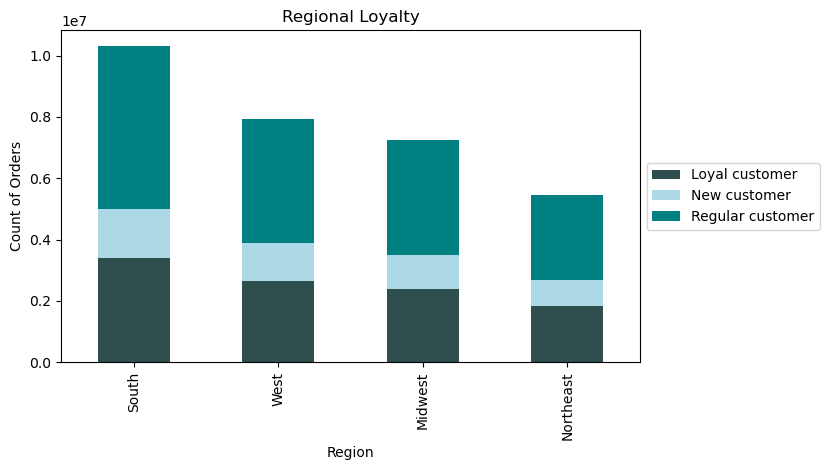

In [119]:
regional_loyalty_bar_stacked = region_loyalty_stack.plot.bar(stacked = True, color= ['darkslategray', 'lightblue', 'teal'])

plt.title('Regional Loyalty')
plt.tight_layout()
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Observations: Regional trends follow overall loyalty count trends. The South has the largest base of Loyal, New, and Regular customers. 
South = 33% of customer orders
West = 26% of customer orders
Midwest = 23% of customer orders
Northeast = 18% of customer orders

In [120]:
# Export chart

regional_loyalty_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_loyalty_bar_stacked.png'),bbox_inches='tight')

# 09. Top products

Note: choice to return to top products analysis after regional exploration and to identify a finer data grain

In [129]:
produce_sub_top = instacart_all.groupby('product_name')['order_id'].count().nlargest(10)

In [130]:
produce_sub_top

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Whole Milk        133514
Name: order_id, dtype: int64

Observations: Bananas and Strawberries are the most popular. The top 9 products are from produce. and each account for 1% of all orders. Organic whole milk is the most popular product in diary eggs and 10th overall. 

In [131]:
produce_sub_top.to_clipboard()

# 10. Age and family status

Address this key question: Is there a connection between age and family status in terms of ordering habits?
Followed by more detailed age and family status exploration.

## Review counts

In [5]:
instacart_all['age_group'].value_counts()

Middle-aged adult    15483886
Older adult           8195544
Young adult           7285134
Name: age_group, dtype: int64

In [6]:
instacart_all['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [7]:
instacart_all['number_of_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: number_of_dependants, dtype: int64

In [8]:
# View counts based on age and marital status

crosstab_age_marital = pd.crosstab(instacart_all['age_group'], instacart_all['marital_status'], dropna = False)

In [9]:
crosstab_age_marital

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-aged adult,623313,0,11582919,3277654
Older adult,2021958,0,6173586,0
Young adult,0,1481172,3987206,1816756


## Explore age and marital status regarding order counts

In [10]:
crosstab_age_marital = crosstab_age_marital.sort_values(['married'], ascending = False)

In [11]:
crosstab_age_marital

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-aged adult,623313,0,11582919,3277654
Older adult,2021958,0,6173586,0
Young adult,0,1481172,3987206,1816756


Observations: The top five customer trends for these measures are
1. Middle-aged adults who are married
2. Older adults who are married
3. Young adults who are married
4. Older adults who are divorced/widowed
5. Young adults living with parents and siblings

Married adults make up the majority of all orders.

In [12]:
crosstab_age_marital.to_clipboard()

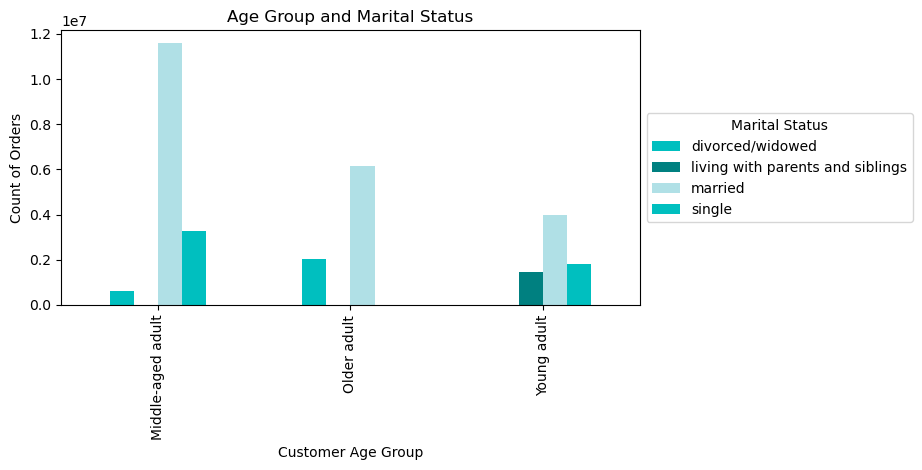

In [13]:
# Create chart showing age and martital status for order count

age_marital_bar = crosstab_age_marital.plot.bar(color=['c', 'teal', 'powderblue'])

plt.title('Age Group and Marital Status')
plt.tight_layout()
plt.xlabel('Customer Age Group')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', title = 'Marital Status', bbox_to_anchor=(1.0, 0.5))

In [14]:
# Export chart

age_marital_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_bar.png'),bbox_inches='tight')

## Explore age and number of dependants in terms of order counts

In [15]:
crosstab_age_dependants = pd.crosstab(instacart_all['age_group'], instacart_all['number_of_dependants'], dropna = False)

In [16]:
crosstab_age_dependants

number_of_dependants,0,1,2,3
age_group,,,,
Middle-aged adult,3900967,3878960,3815801,3888158
Older adult,2021958,2028989,2093847,2050750
Young adult,1816756,1811157,1823613,1833608


In [17]:
crosstab_age_dependants.to_clipboard()

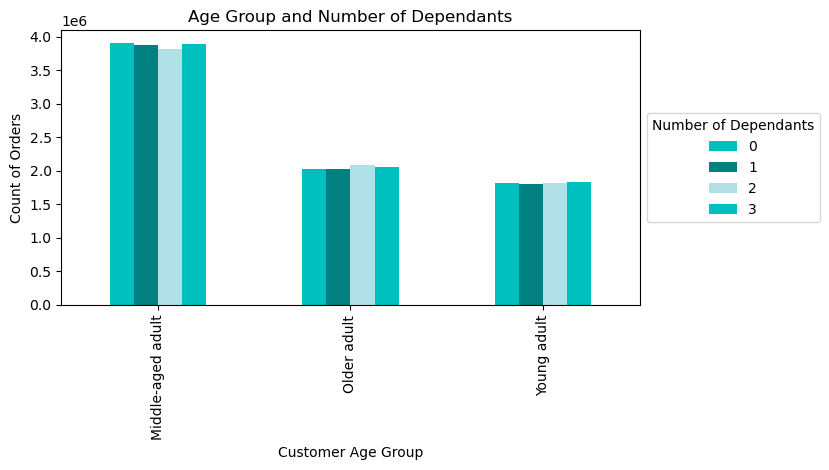

In [18]:
# Create chart showing age and number of dependants distribution

age_dependants_bar = crosstab_age_dependants.plot.bar(color=['c', 'teal', 'powderblue'])

plt.title('Age Group and Number of Dependants')
plt.tight_layout()
plt.xlabel('Customer Age Group')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', title = 'Number of Dependants', bbox_to_anchor=(1.0, 0.5))

Observation: There are almost no differences in the number of dependants and customer's age group. 

In [19]:
# Export chart

age_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_bar.png'),bbox_inches='tight')

Althought the bar chart above as well as the scatterplot from prior exercises implies no relationship, the client also requests a line plot between the age and dependant variables.

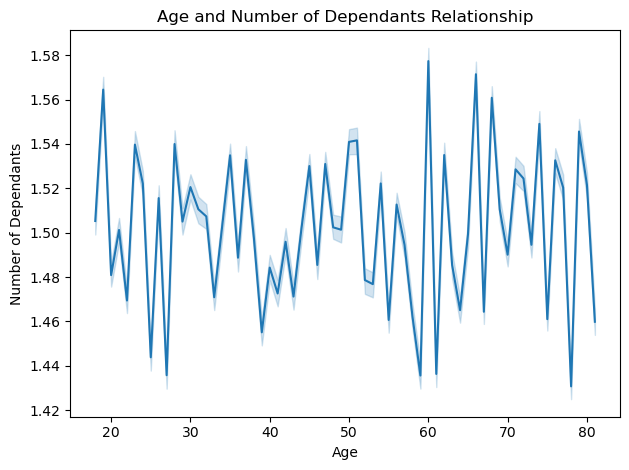

In [22]:
# Create line plot that shows age and number of dependants (from exercise task)

age_dependants_line = sns.lineplot(data= insta_small, x='age', y='number_of_dependants')

plt.title('Age and Number of Dependants Relationship')
plt.tight_layout()
plt.xlabel('Age')
plt.ylabel('Number of Dependants')

plt.show()

# using small sf sample due to line plot and memory usage

As expected based on other analysis, there is not clear a relationship between age and the number of dependants for Instacart customers

In [23]:
# Export chart

age_dependants_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line.png'),bbox_inches='tight')

# Age and Marital status groupings

Note: chose to focus on this specific intersection due to above analysis. Because the number of dependants is evenly spread, family groups will be focused on age and marital status

Text(0, 0.5, 'Count of Orders')

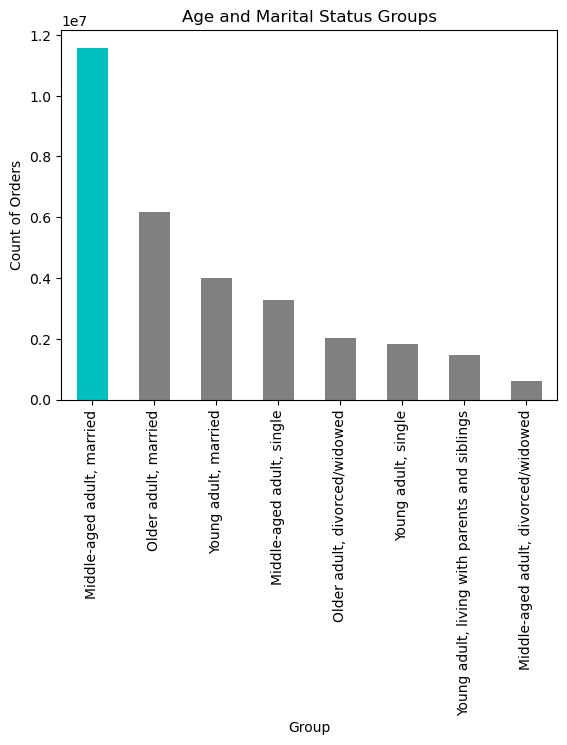

In [124]:
# Create age and marital group value counts bar

age_marital_group_bar = instacart_all['age_marital_group'].value_counts().plot.bar(color= ['c', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Age and Marital Status Groups')
plt.xlabel('Group')
plt.ylabel('Count of Orders')

In [ ]:
# Export figure

age_marital_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_group_bar.png'), bbox_inches='tight')

## Descriptive stats for age_marital groupings

In [ ]:
# Crosstab of statistics

age_marital_stats_crosstab = instacart_all.groupby('age_marital_group').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [ ]:
age_marital_stats_crosstab

Observations: The top demographic for age_marital status groups are Middle-aged adults who are married. The top three groups are all married. These groups are within 2 cents of each other for mean item price, implying that the order count is what drives their expenditure. Young single adults are the only group that makes the most orders on Tuesday. 

In [ ]:
age_marital_stats_crosstab.to_clipboard()

## Create a variable for customer age and marital status

In [73]:
instacart_all.loc[(instacart_all['age_group'].isin(['Middle-aged adult'])) & (instacart_all['marital_status'] =='married'), 'age_marital_group'] = 'Middle-aged adult, married'

In [75]:
instacart_all.loc[(instacart_all['age_group'].isin(['Middle-aged adult'])) & (instacart_all['marital_status'] =='single'), 'age_marital_group'] = 'Middle-aged adult, single'

In [70]:
instacart_all.loc[(instacart_all['age_group'].isin(['Middle-aged adult'])) & (instacart_all['marital_status'] =='divorced/widowed'), 'age_marital_group'] = 'Middle-aged adult, divorced/widowed'

In [11]:
instacart_all.loc[(instacart_all['age_group'].isin(['Middle-aged adult'])) & (instacart_all['marital_status'] =='living with parents and siblings'), 'age_marital_group'] = 'Middle-aged adult, living with parents and siblings'

In [12]:
instacart_all.loc[(instacart_all['age_group'].isin(['Older adult'])) & (instacart_all['marital_status'] =='married'), 'age_marital_group'] = 'Older adult, married'

In [13]:
instacart_all.loc[(instacart_all['age_group'].isin(['Older adult'])) & (instacart_all['marital_status'] =='single'), 'age_marital_group'] = 'Older adult, single'

In [14]:
instacart_all.loc[(instacart_all['age_group'].isin(['Older adult'])) & (instacart_all['marital_status'] =='divorced/widowed'), 'age_marital_group'] = 'Older adult, divorced/widowed'

In [15]:
instacart_all.loc[(instacart_all['age_group'].isin(['Older adult'])) & (instacart_all['marital_status'] =='living with parents and siblings'), 'age_marital_group'] = 'Older adult, living with parents and siblings'

In [16]:
instacart_all.loc[(instacart_all['age_group'].isin(['Young adult'])) & (instacart_all['marital_status'] =='married'), 'age_marital_group'] = 'Young adult, married'

In [17]:
instacart_all.loc[(instacart_all['age_group'].isin(['Young adult'])) & (instacart_all['marital_status'] =='single'), 'age_marital_group'] = 'Young adult, single'

In [18]:
instacart_all.loc[(instacart_all['age_group'].isin(['Young adult'])) & (instacart_all['marital_status'] =='divorced/widowed'), 'age_marital_group'] = 'Young adult, divorced/widowed'

In [19]:
instacart_all.loc[(instacart_all['age_group'].isin(['Young adult'])) & (instacart_all['marital_status'] =='living with parents and siblings'), 'age_marital_group'] = 'Young adult, living with parents and siblings'

In [76]:
instacart_all['age_marital_group'].value_counts (dropna= False)

Middle-aged adult, married                       11582919
Older adult, married                              6173586
Young adult, married                              3987206
Middle-aged adult, single                         3277654
Older adult, divorced/widowed                     2021958
Young adult, single                               1816756
Young adult, living with parents and siblings     1481172
Middle-aged adult, divorced/widowed                623313
Name: age_marital_group, dtype: int64

Note: As shown by the age_group x marital_status crosstab in prior steps above, the following age group marital status groups have 0 customers:

Middle-aged adult and living with parents and siblings Older adults and single Older adult and living with parents and siblings Young adult and divorced/widowed

The sum of the value counts is 30,964,564, which is the accurate count for all customer orders in the instacart_all data frame

Text(0, 0.5, 'Count of Orders')

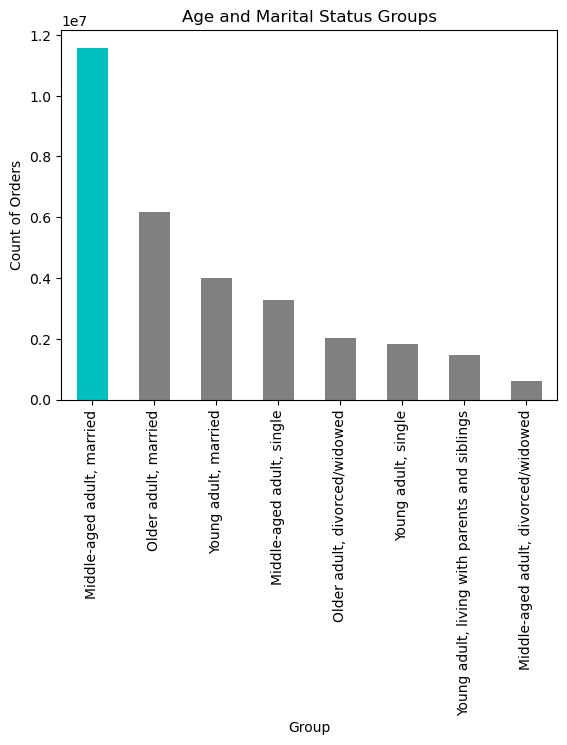

In [76]:
# Create age and marital group value counts bar

age_marital_group_bar = instacart_all['age_marital_group'].value_counts().plot.bar(color= ['c', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Age and Marital Status Groups')
plt.xlabel('Group')
plt.ylabel('Count of Orders')

In [77]:
# Export figure

age_marital_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_group_bar.png'), bbox_inches='tight')

Text(0, 0.5, 'Marital Group')

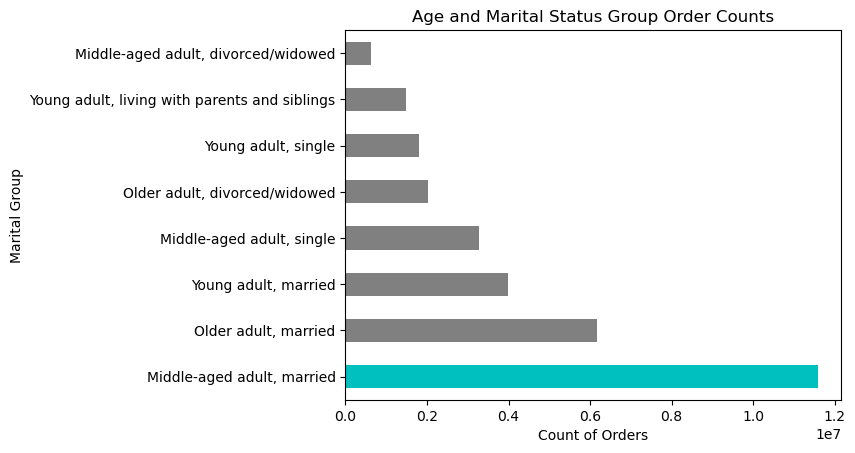

In [78]:
# make chart horizontal bar due to length of labels

# Create age and marital group value counts bar

age_marital_group_horiz_bar= instacart_all['age_marital_group'].value_counts().plot.barh(color= ['c', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'grey'])
plt.title('Age and Marital Status Group Order Counts')
plt.xlabel('Count of Orders')
plt.ylabel('Marital Group')

In [79]:
# Export figure

age_marital_group_horiz_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_group_horiz_bar.png'), bbox_inches='tight')

In [78]:
# Crosstab of statistics

age_marital_stats_crosstab = instacart_all.groupby('age_marital_group').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [79]:
age_marital_stats_crosstab

order_id max_order             \
                                                  count       min       mean   
age_marital_group                                                              
Middle-aged adult, divorced/widowed              623313         5  35.579564   
Middle-aged adult, married                     11582919         5  34.406561   
Middle-aged adult, single                       3277654         5  34.951578   
Older adult, divorced/widowed                   2021958         5  34.442822   
Older adult, married                            6173586         5  34.288679   
Young adult, living with parents and siblings   1481172         5  34.853070   
Young adult, married                            3987206         5  34.049046   
Young adult, single                             1816756         5  34.127647   

                                                  order_day_of_week  \
                                              max            median   
age_marital_group                                                     
Middle-aged adult, divorced/widowed            99               3.0   
Middle-aged adult, married                     99               3.0   
Middle-aged adult, single                      99               3.0   
Older adult, divorced/widowed                  99               3.0   
Older adult, married                           99               3.0   
Young adult, living with parents and siblings  99               3.0   
Young adult, married                           99               3.0   
Young adult, single                            99               2.0   

                                              order_hour_of_day prices  \
                                                         median    min   
age_marital_group                                                        
Middle-aged adult, divorced/widowed                        13.0    1.0   
Middle-aged adult, married                                 13.0    1.0   
Middle-aged adult, single                                  13.0    1.0   
Older adult, divorced/widowed                              13.0    1.0   
Older adult, married                                       13.0    1.0   
Young adult, living with parents and siblings              13.0    1.0   
Young adult, married                                       13.0    1.0   
Young adult, single                                        13.0    1.0   

                                                               
                                                   mean   max  
age_marital_group                                              
Middle-aged adult, divorced/widowed            7.797874  25.0  
Middle-aged adult, married                     7.790623  25.0  
Middle-aged adult, single                      7.788754  25.0  
Older adult, divorced/widowed                  7.801982  25.0  
Older adult, married                           7.794990  25.0  
Young adult, living with parents and siblings  7.800604  25.0  
Young adult, married                           7.781983  25.0  
Young adult, single                            7.774294  25.0

Observations: The top demographic for age_marital status groups are Middle-aged adults who are married. The top three groups are all married. These groups are within 2 cents of each other for mean item price, implying that the order count is what drives their expenditure. Young single adults are the only group that makes the most orders on Tuesday.

In [80]:
age_marital_stats_crosstab.to_clipboard()

## Differences in time of order by marital_age groups

In [91]:
# Hour of day and age_marital group value counts

crosstab_age_marital_small__hour_of_day_values = pd.crosstab(insta_small['order_hour_of_day'], insta_small['age_marital_group'], dropna = False)

In [92]:
crosstab_age_marital_small__hour_of_day_values

age_marital_group,"Middle-aged adult, divorced/widowed","Middle-aged adult, married","Middle-aged adult, single","Older adult, divorced/widowed","Older adult, married","Young adult, living with parents and siblings","Young adult, married","Young adult, single"
order_hour_of_day,,,,,,,,
0,1102,22977,7109,3677,12316,3139,8156,3522
1,607,12216,3602,1942,6662,1615,4373,1785
2,395,7055,2061,1372,3810,1047,2732,1109
3,252,5343,1547,1096,2912,767,1960,821
4,307,5460,1625,876,3158,810,1963,848
5,524,9267,2555,1804,5199,1304,3150,1534
6,1514,30704,8790,5566,16979,4419,10771,5302
7,5587,95274,27638,17878,52254,12385,32785,15264
8,10374,184697,53455,32274,99640,22673,64759,28491


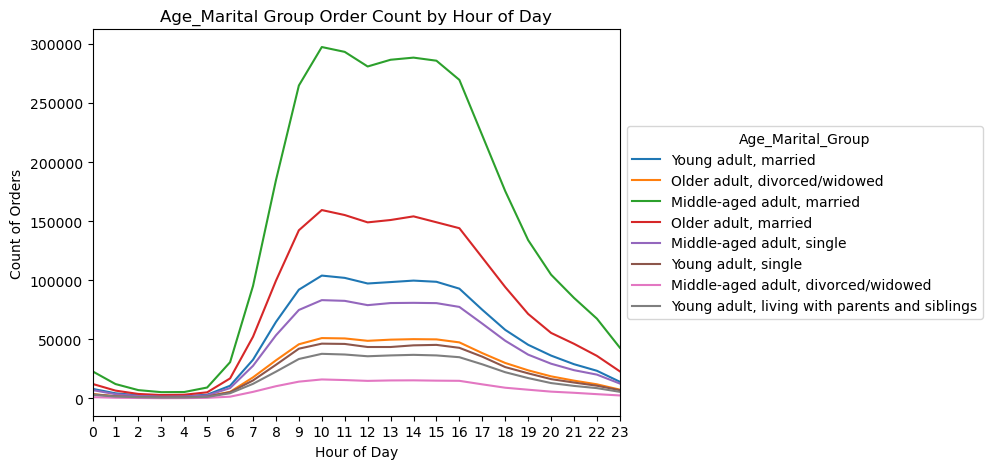

In [98]:
# Create line plot that shows customer age_marital group order count by hour of day

age_marital_group_hour_of_day_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='order_id', estimator='count', hue='age_marital_group', errorbar=None)

plt.title('Age_Marital Group Order Count by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Count of Orders')
plt.legend(title='Age_Marital_Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: All age_marital groups follow similar ordering patterns across hour of day. Middle-aged married adults and older adults who are married (the top 2 customer groups in this grouping) have a dip in orders between 9am and 12pm. The only demographic who does not dip between 9am and 4pm is middle aged adults who are divorced/widowed. 

In [99]:
# Export figure

age_marital_group_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_group_hour_of_day_line.png'), bbox_inches='tight')

In [93]:
# Day of week and age_marital group value counts

crosstab_age_marital_small_day_of_week_values = pd.crosstab(insta_small['order_day_of_week'], insta_small['age_marital_group'], dropna = False)

## Marital age groups and day of week

In [94]:
crosstab_age_marital_small_day_of_week_values

age_marital_group,"Middle-aged adult, divorced/widowed","Middle-aged adult, married","Middle-aged adult, single","Older adult, divorced/widowed","Older adult, married","Young adult, living with parents and siblings","Young adult, married","Young adult, single"
order_day_of_week,,,,,,,,
0,35070,659344,189082,115345,355374,83963,230497,102884
1,33375,606076,171973,104783,320657,77578,209249,99372
2,24469,452761,127367,78810,240697,57558,154849,69988
3,21625,411400,116691,72986,220558,52156,141862,64191
4,21625,408804,115047,70455,216097,51984,139890,64550
5,25496,450575,130109,78506,240648,58373,156186,69695
6,25619,484091,133183,85132,259290,61776,164939,73808


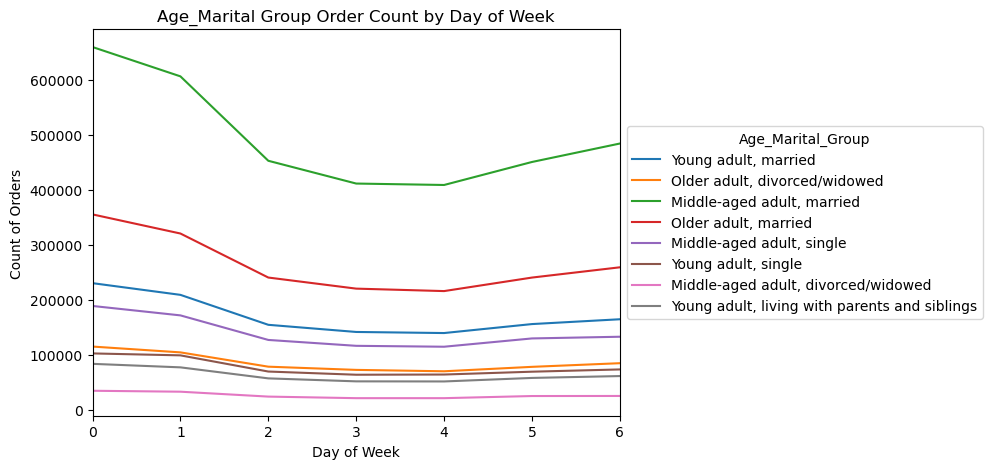

In [100]:
# Create line plot that shows customer age_marital group by day of week

age_marital_group_day_of_week_line = sns.lineplot(data= insta_small, x='order_day_of_week', y='order_id', estimator='count', hue='age_marital_group', errorbar=None)

plt.title('Age_Marital Group Order Count by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.xlim(xmin=0, xmax=6)
plt.locator_params('x', nbins= 7)
plt.ylabel('Count of Orders')
plt.legend(title='Age_Marital_Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: All age_marital groups follow similar trends in order counts across days of the week. The main difference in these groupings, based on the above charts, is the quantity of orders (vs. time of order or price of item).

In [101]:
# Export figure

age_marital_group_day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_group_day_of_week_line.png'), bbox_inches='tight')

## Examine department trends based on age marital groups

In [82]:
# Crosstab of age_marital groups and deparments

crosstab_age_marital_depart = pd.crosstab(instacart_all['department'], instacart_all['age_marital_group'], dropna = False)

In [83]:
crosstab_age_marital_depart

age_marital_group,"Middle-aged adult, divorced/widowed","Middle-aged adult, married","Middle-aged adult, single","Older adult, divorced/widowed","Older adult, married","Young adult, living with parents and siblings","Young adult, married","Young adult, single"
department,,,,,,,,
alcohol,2720,52934,16886,9139,27554,8379,18933,8082
babies,8459,157210,43434,25892,80312,19381,50161,25543
bakery,23317,418787,119355,72418,223579,53684,143383,66305
beverages,52237,961795,274240,168642,515378,119107,330280,150222
breakfast,14104,251522,70509,42486,132810,33198,86888,39333
bulk,582,12598,3355,2094,6851,1633,4369,1969
canned goods,19525,377645,107333,64743,202766,48477,132166,59419
dairy eggs,103802,1932018,547951,338800,1029272,250207,671309,303823
deli,21381,374168,108145,65368,199831,48119,128334,58488


In [84]:
crosstab_age_marital_depart.to_clipboard()

In [85]:
subset_age_marital_depart = instacart_all.loc[instacart_all['age_marital_group'].isin(['Middle-aged adult, married', 'Older adult, married', 'Young adult, married', 'Middle-aged adult, single'])]

In [86]:
subset_age_marital_depart.head(20)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,marital_status,income,region,customer_activity,department,top_depart,age_group,age_marital_group
0,2539329,1,1,2,8,0,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
1,2398795,1,2,3,7,15,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
2,473747,1,3,3,12,21,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
3,2254736,1,4,4,7,29,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
4,431534,1,5,4,15,28,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
5,3367565,1,6,2,7,19,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
6,550135,1,7,1,9,20,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
7,3108588,1,8,1,14,14,196,2,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
8,2295261,1,9,1,16,0,196,4,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"
9,2550362,1,10,4,8,30,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,beverages,Top-department,Young adult,"Young adult, married"


In [90]:
# Isolate variables from subset, goal to find trends in product preference for the top 4 customer groupings in age and marital status

crosstab_subset = pd.crosstab(subset_age_marital_depart['department'], subset_age_marital_depart['age_marital_group'], dropna = False)

In [91]:
crosstab_subset

age_marital_group,"Middle-aged adult, married","Middle-aged adult, single","Older adult, married","Young adult, married"
department,,,,
alcohol,52934,16886,27554,18933
babies,157210,43434,80312,50161
bakery,418787,119355,223579,143383
beverages,961795,274240,515378,330280
breakfast,251522,70509,132810,86888
bulk,12598,3355,6851,4369
canned goods,377645,107333,202766,132166
dairy eggs,1932018,547951,1029272,671309
deli,374168,108145,199831,128334


In [95]:
crosstab_subset.to_clipboard()

In [94]:
crosstab_subset.sort_index(axis=1, ascending = False)

age_marital_group,"Young adult, married","Older adult, married","Middle-aged adult, single","Middle-aged adult, married"
department,,,,
alcohol,18933,27554,16886,52934
babies,50161,80312,43434,157210
bakery,143383,223579,119355,418787
beverages,330280,515378,274240,961795
breakfast,86888,132810,70509,251522
bulk,4369,6851,3355,12598
canned goods,132166,202766,107333,377645
dairy eggs,671309,1029272,547951,1932018
deli,128334,199831,108145,374168


In [30]:
# Create subset to show trends for highest marital_status and age customer base

subset_middle_aged_married = instacart_all.loc[instacart_all['age_marital_group'] == 'Middle-aged adult, married']

In [31]:
# check subset

subset_middle_aged_married.head(20)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,customer_activity,department,top_depart,age_group,age_marital_group,spending_power_group,dependant_flag,caregiver_status
33,2293453,19,2,5,14,6,196,3,0,Soda,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
34,1973799,19,5,6,12,8,196,15,1,Soda,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
35,532817,19,7,4,17,6,196,1,1,Soda,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
36,1321974,19,1,6,13,0,14252,16,0,Coke Zero Diet Soda,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
37,2293453,19,2,5,14,6,14252,10,1,Coke Zero Diet Soda,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
38,2808909,19,4,5,12,5,14252,2,1,Coke Zero Diet Soda,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
39,2293453,19,2,5,14,6,12108,1,0,Kiwi Strawberry with Electrolytes & Vitamins W...,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
40,2808909,19,4,5,12,5,12108,3,1,Kiwi Strawberry with Electrolytes & Vitamins W...,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
41,2474845,19,6,5,13,20,12108,1,1,Kiwi Strawberry with Electrolytes & Vitamins W...,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
42,532817,19,7,4,17,6,12108,20,1,Kiwi Strawberry with Electrolytes & Vitamins W...,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver


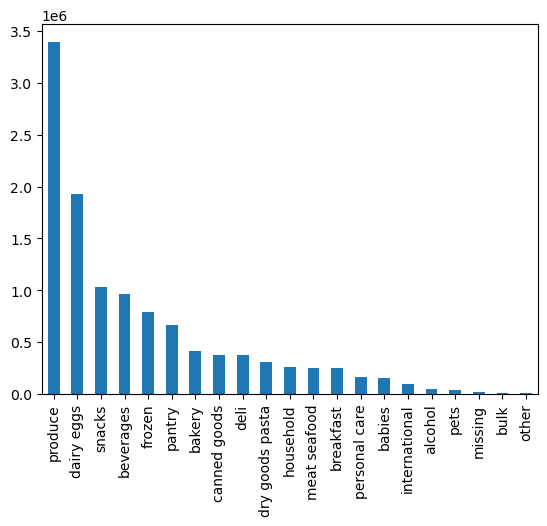

In [11]:
# Create bar chart to show department trends for middle-aged adults who are married (maam)

maam_depart_bar = subset_middle_aged_married['department'].value_counts().plot.bar()

In [13]:
#create subset of specific products in produce

subset_prod_maam = subset_middle_aged_married.loc[subset_middle_aged_married['department'] == 'produce']

In [14]:
subset_prod_maam.tail(20)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,marital_status,income,region,customer_activity,department,top_depart,age_group,age_marital_group
20294589,2704077,106923,8,0,12,29,15772,2,0,Pineapple Spears,...,9/16/2018,2,married,65313,Northeast,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294590,1377600,124532,1,5,13,0,4724,1,0,Broccoli Florettes,...,6/23/2018,2,married,112983,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294591,3305203,124532,2,0,8,30,4724,1,1,Broccoli Florettes,...,6/23/2018,2,married,112983,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294592,2418796,124532,3,5,15,30,4724,1,1,Broccoli Florettes,...,6/23/2018,2,married,112983,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294593,980840,124532,4,0,8,30,4724,2,1,Broccoli Florettes,...,6/23/2018,2,married,112983,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294594,1090350,124532,5,0,12,21,4724,1,1,Broccoli Florettes,...,6/23/2018,2,married,112983,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294595,1985501,84702,4,1,14,1,30278,2,0,Organic Caesar Complete Salad Kit,...,9/6/2017,3,married,30390,Midwest,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294596,1071578,76992,3,2,14,4,35269,1,0,Vegetable Tray With Low Fat Dressing,...,9/15/2019,2,married,45166,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294597,1437825,76992,5,4,12,30,35269,2,1,Vegetable Tray With Low Fat Dressing,...,9/15/2019,2,married,45166,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"
20294598,2613556,76992,6,4,13,7,35269,1,1,Vegetable Tray With Low Fat Dressing,...,9/15/2019,2,married,45166,South,High-activity customer,produce,Top-department,Middle-aged adult,"Middle-aged adult, married"


In [23]:
#Identify specific top items for married middle-aged adults

crosstab_produce_maam = subset_prod_maam.groupby('product_name').agg({'order_id':['count']})

In [24]:
crosstab_produce_maam.columns

MultiIndex([('order_id', 'count')],
           )

In [42]:
sorted_produce_maam = crosstab_produce_maam.sort_values([('order_id', 'count')], ascending = [False])

In [45]:
produce_maam_top = sorted_produce_maam.head(10)

In [46]:
produce_maam_top

,order_id
,count
product_name,
Banana,169706
Bag of Organic Bananas,137167
Organic Strawberries,95295
Organic Baby Spinach,86614
Organic Hass Avocado,77472
Organic Avocado,63164
Large Lemon,54356
Strawberries,51004


In [57]:
produce_maam_top.to_clipboard()

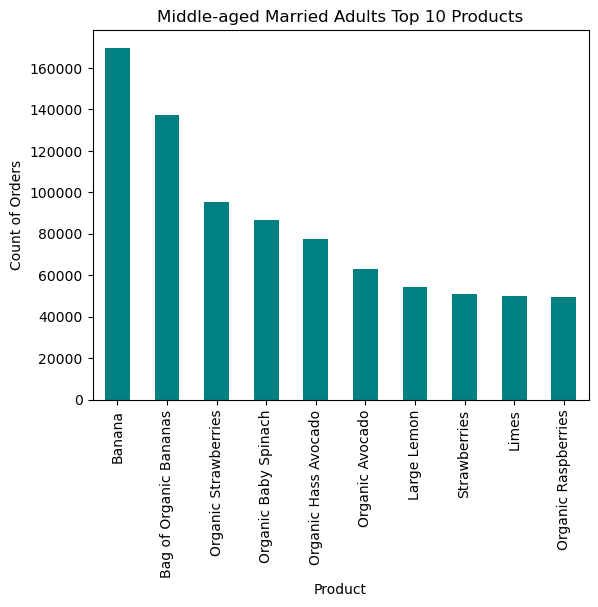

In [56]:
produce_maam_top_bar = produce_maam_top.plot.bar(color = 'teal')
                                                            
plt.title('Middle-aged Married Adults Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Count of Orders')
plt.legend().remove()

Observations: The top 10 items for the top age_martial status grouping are all product., and 6 of the items are organic.Bananas make up the top 2 products for this demographic.

In [62]:
# Export figure

produce_maam_top_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'produce_maam_top_bar.png'), bbox_inches='tight')

## Target middle-aged married adult expenditure

Note: isolating this group since it's the age_marital group with the highest number of order counts

In [36]:
# Create middle_aged married subset from small dataframe

small_subset_middle_aged_married = insta_small.loc[insta_small['age_marital_group'] == 'Middle-aged adult, married']

In [37]:
# Check subset

small_subset_middle_aged_married.shape

(3473051, 39)

In [38]:
small_subset_middle_aged_married.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,customer_activity,department,top_depart,age_group,age_marital_group,spending_power_group,dependant_flag,caregiver_status
42,532817,19,7,4,17,6,12108,20,1,Kiwi Strawberry with Electrolytes & Vitamins W...,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
50,2808909,19,4,5,12,5,46052,5,1,Mountain berry Blast Sports Drink,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
56,532817,19,7,4,17,6,3334,32,0,Fruit Juicy Red Juice Drink,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
58,532817,19,7,4,17,6,34724,42,0,Water Beverage with Vitamins Black Cherry Flavor,...,151988,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Older, middle power",Has dependants,Cohabitating caregiver
109,1593000,31,10,3,8,7,196,17,0,Soda,...,52311,South,High-activity customer,beverages,Top-department,Middle-aged adult,"Middle-aged adult, married","Younger, low power",Has dependants,Cohabitating caregiver


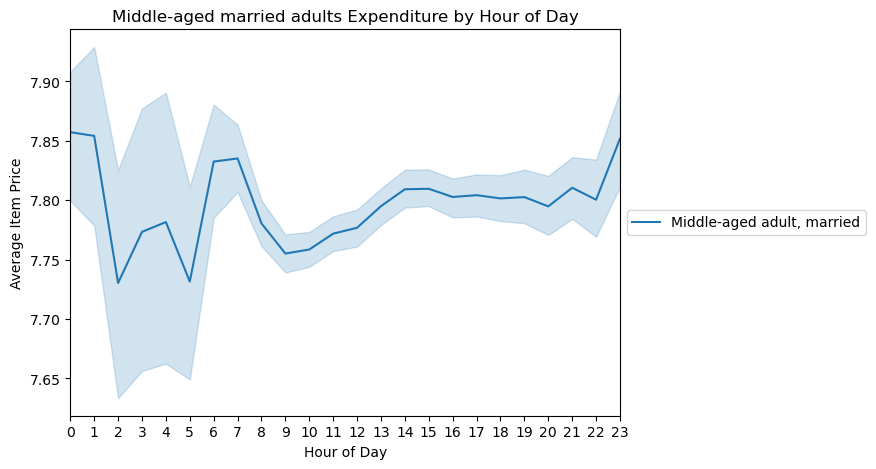

In [39]:
# Create line chart for expenditure throughout the day specifically for middle-aged married adults (top order count)

middle_aged_married_expenditure_line = sns.lineplot(data=small_subset_middle_aged_married, x='order_hour_of_day', y='prices', hue='age_marital_group', color=['forestgreen'], estimator='mean') 
                                                            
plt.title('Middle-aged married adults Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()


Observations: Middle-aged married adults have the highest expenditure between 11pm and 1am and between 6am and 7am. Their lowest expenditure times are at 2am and 5am. Average item prices increase steadily between 8am and 2pm and platteau until 5pm.

In [40]:
#Export figure

middle_aged_married_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'middle_aged_married_expenditure_line.png'), bbox_inches='tight')

Note: will conduct further analysis on family status groupings outside of just age metrix below under "family status profiling"

# 11. Age and spending power

Key question: Is there a connection between age and spending power?

Note: Previous analysis revealed that there is no significant correlation between age and income. However, there are clear trends. Most customers make under 200,000. There appears to be two groups of income variance, one between ages 20 and 40 and another between ages 40 and 80. This alligns with general concepts of career advancement and higher income across time. All of the high outliers for income are within customers above age 40. There is also a significant number of customers between age 40 and 80 who make between 200,000 and 300,000 that does not exist for people under age 40. Furthermore, there is more spread in income for people between ages 40 and 80. Based on the chart, the following age and spending power groups emerge.


*Note the use of langauge "spending power" vs. "income" since these figures breakdown people in higher-income brackets that are separate from SES class and instead map onto this specific chart. Furthermore, categories use "younger" and "older" since there are two clear age groups, which seems to merge the middle and old aged adult categories. All age and spending power analysis is in addition to the separate age and income analyses below. 

In [63]:
# Create groupings for age and spending power (see notes above)

instacart_all.loc[(instacart_all['age']<40) & (instacart_all['income'] <100000), 'spending_power_group'] = 'Younger, low power'

In [64]:
instacart_all.loc[(instacart_all['age']<40) & (instacart_all['income'] >=100000) & (instacart_all['income'] <200000), 'spending_power_group'] = 'Younger, middle power'

In [65]:
instacart_all.loc[(instacart_all['age']<40) & (instacart_all['income'] >=200000), 'spending_power_group'] = 'Younger, higher power'

In [88]:
instacart_all.loc[(instacart_all['age']>=40) & (instacart_all['income'] <100000), 'spending_power_group'] = 'Older, low power'

In [89]:
instacart_all.loc[(instacart_all['age']>=40) & (instacart_all['income'] >=100000) & (instacart_all['income'] <200000), 'spending_power_group'] = 'Older, middle power'

In [90]:
instacart_all.loc[(instacart_all['age']>=40) & (instacart_all['income'] >=200000), 'spending_power_group'] = 'Older, higher power'

In [91]:
# Check value counts for accurate variable creation

instacart_all['spending_power_group'].value_counts()

Older, middle power      13647300
Younger, low power       10319874
Older, low power          6437288
Younger, middle power      305960
Older, higher power        214866
Younger, higher power       39276
Name: spending_power_group, dtype: int64

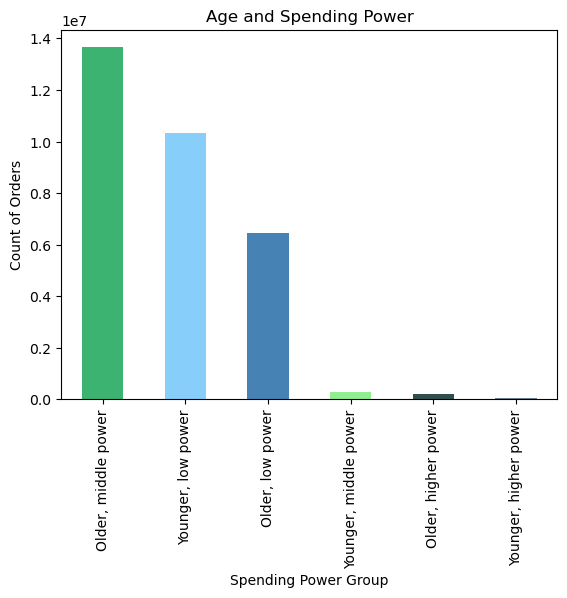

In [23]:
spending_power_group_bar = instacart_all['spending_power_group'].value_counts().plot.bar(color = ['mediumseagreen','lightskyblue','steelblue','lightgreen','darkslategrey','slategrey'])
                                                            
plt.title('Age and Spending Power')
plt.xlabel('Spending Power Group')
plt.ylabel('Count of Orders')
plt.legend().remove()

Observations: Older-middle spending power adults and younger low power adultsmake the most orders (99.2%), followed by younger and Older adults with low power. This is significant because adults of both age groups with higher power make the least amount of orders regardless of their higher income. Adults with higher spending power make the highest number of orders and buy items with the highest prices. This implies that middle and lower power spenders who are yonger and older make less orders, but with more items that are also less expensive compared to customers with higher spending power. 

In [20]:
# Export figure

spending_power_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_power_group_bar.png'), bbox_inches='tight')

In [14]:
#check value counts to match with line plot

crosstab_spending_power_expenditure_hour_of_day = insta_small.groupby(['order_hour_of_day','spending_power_group']).agg({'prices':['mean']})

In [16]:
crosstab_spending_power_expenditure_hour_of_day

prices
                                             mean
order_hour_of_day spending_power_group           
0                 Older, higher power    7.630537
                  Older, low power       7.490907
                  Older, middle power    7.955647
                  Younger, higher power  8.193939
                  Younger, low power     7.789680
...                                           ...
23                Older, low power       7.480743
                  Older, middle power    7.961715
                  Younger, higher power  8.078000
                  Younger, low power     7.778215
                  Younger, middle power  7.870603

[144 rows x 1 columns]

In [15]:
crosstab_spending_power_expenditure_hour_of_day.to_clipboard()

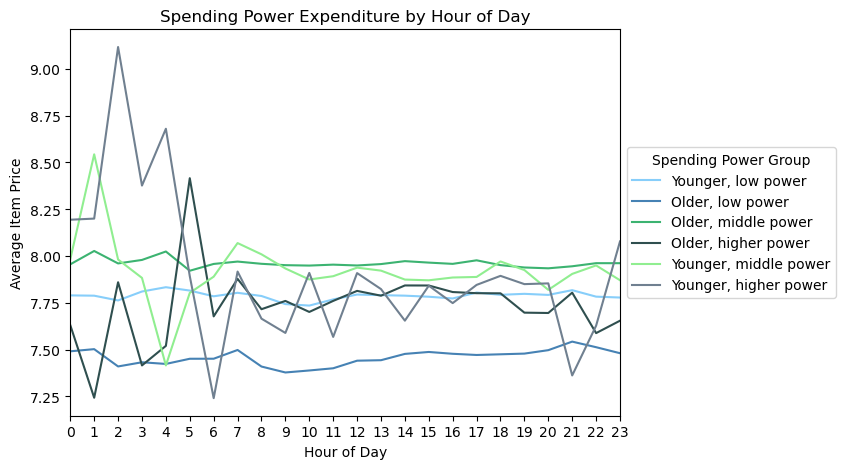

In [27]:
# Create line chart for expenditure throughout the day based on age and spending power

spending_power_expenditure_line = sns.lineplot(data=insta_small, x='order_hour_of_day', y='prices', hue='spending_power_group', palette=['lightskyblue','steelblue','mediumseagreen','darkslategrey','lightgreen','slategrey'], estimator='mean', errorbar=None) 
                                                            
plt.title('Spending Power Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(title='Spending Power Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: Older, middle power adults make the most orders and are also the most consistent in item price (around $8.00) throughout the day. Low power adults of both age groups also show consistent average item prices.

The following spending power groups follow similar average item price throughout the day in terms of average price and fluctuations: 'Younger, low power', 'Older, middle power'

Older, low power adults follow fluctuation patterns of the above two groups, but have a lower average item price.

Younger, middle power adults peak at 1am, dip at 4am, then remain stable throughout the rest of the day.

Younger, high power adults show the most volatility in hourly expenditure, peaking at 2am and 5am, with lowest times at 6am and 21 (9pm).

Older, high power adults peak at 2am and 5am and dip at 1am.

In [29]:
# Export figure

spending_power_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_power_expenditure_line.png'), bbox_inches='tight')

In [113]:
# Create a crosstab showing spending power group ordering habbit patterns

crosstab_spending_power = instacart_all.groupby('spending_power_group').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [114]:
crosstab_spending_power.columns

MultiIndex([(         'order_id',  'count'),
            (        'max_order',    'min'),
            (        'max_order',   'mean'),
            (        'max_order',    'max'),
            ('order_day_of_week', 'median'),
            ('order_hour_of_day', 'median'),
            (           'prices',    'min'),
            (           'prices',   'mean'),
            (           'prices',    'max')],
           )

In [115]:
crosstab_spending_power = crosstab_spending_power.sort_values([('order_id', 'count')], ascending = [False])

In [116]:
crosstab_spending_power

order_id max_order                order_day_of_week  \
                          count       min       mean max            median   
spending_power_group                                                         
Older, middle power    13647300         5  34.507873  99               3.0   
Younger, low power     10319874         5  34.498829  99               3.0   
Older, low power        6437288         5  33.968018  99               3.0   
Younger, middle power    305960         5  34.725232  99               3.0   
Older, higher power      214866         5  39.043534  99               3.0   
Younger, higher power     39276         5  34.065867  99               3.0   

                      order_hour_of_day prices                  
                                 median    min      mean   max  
spending_power_group                                            
Older, middle power                13.0    1.0  7.957655  25.0  
Younger, low power                 13.0    1.0  7.781258  25.0  
Older, low power                   13.0    1.0  7.446249  25.0  
Younger, middle power              13.0    1.0  7.909935  25.0  
Older, higher power                13.0    1.0  7.782650  25.0  
Younger, higher power              13.0    1.0  7.748602  25.0

In [117]:
crosstab_spending_power.to_clipboard()

# 12. Age profiling continued

In [8]:
# Review added columns and variables for status check 

instacart_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'region', 'customer_activity', 'department', 'top_depart',
       'age_group', 'age_marital_group', 'spending_power_group'],
      dtype='object')

In [9]:
# Summary stats for age groups

age_group_stats_crosstab = instacart_all.groupby('age_group').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [10]:
age_group_stats_crosstab_sort = age_group_stats_crosstab.sort_values([('order_id', 'count')], ascending = [False])

In [11]:
age_group_stats_crosstab_sort

order_id max_order                order_day_of_week  \
                      count       min       mean max            median   
age_group                                                                
Middle-aged adult  15483886         5  34.569151  99               3.0   
Older adult         8195544         5  34.326709  99               3.0   
Young adult         7285134         5  34.232117  99               3.0   

                  order_hour_of_day prices                  
                             median    min      mean   max  
age_group                                                   
Middle-aged adult              13.0    1.0  7.790519  25.0  
Older adult                    13.0    1.0  7.796715  25.0  
Young adult                    13.0    1.0  7.783851  25.0

In [12]:
age_group_stats_crosstab_sort.to_clipboard()

## Age group loyalty status

In [32]:
# Look for loyalty differences by age

age_group_loyalty_crosstab = pd.crosstab(instacart_all['loyalty_flag'], instacart_all['age_group'], dropna = False)

In [33]:
age_group_loyalty_crosstab

age_group,Middle-aged adult,Older adult,Young adult
loyalty_flag,,,
Loyal customer,5175463,2723958,2384672
New customer,2392561,1276659,1134475
Regular customer,7915862,4194927,3765987


In [34]:
age_group_loyalty_crosstab = age_group_loyalty_crosstab.sort_values(['Middle-aged adult'], ascending = [False])

In [35]:
age_group_loyalty_crosstab

age_group,Middle-aged adult,Older adult,Young adult
loyalty_flag,,,
Regular customer,7915862,4194927,3765987
Loyal customer,5175463,2723958,2384672
New customer,2392561,1276659,1134475


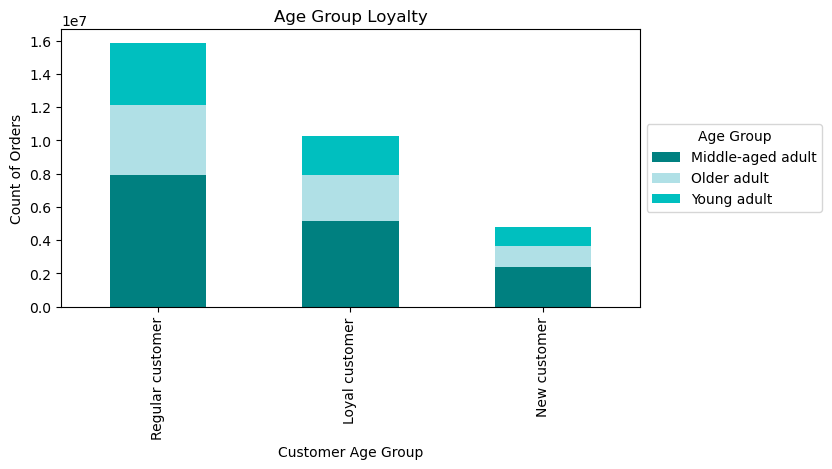

In [39]:
age_group_loyalty_bar = age_group_loyalty_crosstab.plot.bar(stacked = True, color=['teal','powderblue', 'c'])

plt.title('Age Group Loyalty')
plt.tight_layout()
plt.xlabel('Customer Age Group')
plt.ylabel('Count of Orders')
plt.legend(loc='center left', title = 'Age Group', bbox_to_anchor=(1.0, 0.5))

Observations: Age groups follow similar trends across loyalty status.

In [40]:
# Export figure

age_group_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_loyalty_bar.png'), bbox_inches='tight')

## Age group day of week as line plot

In [102]:
# Check value counts via crosstab

crosstab_age_dow = pd.crosstab(instacart_all['order_day_of_week'], instacart_all['age_group'], dropna = False)

In [103]:
crosstab_age_dow

age_group,Middle-aged adult,Older adult,Young adult
order_day_of_week,,,
0,2947868,1566244,1394498
1,2705698,1417495,1288493
2,2018191,1065170,941345
3,1832995,978350,858190
4,1815408,956161,853425
5,2019820,1066115,947794
6,2143906,1146009,1001389


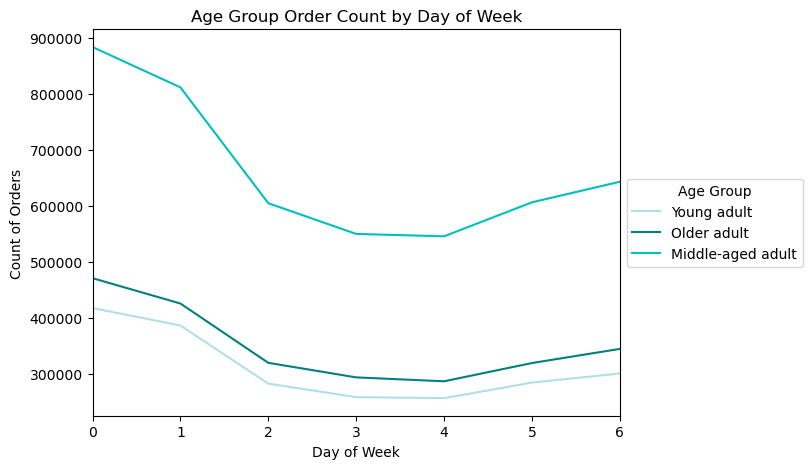

In [110]:
# Create line plot that shows customer age group by day of week

age_group_day_of_week_line = sns.lineplot(data= insta_small, x='order_day_of_week', y='order_id', estimator='count', hue='age_group', palette =['powderblue', 'teal', 'c'], errorbar=None)

plt.title('Age Group Order Count by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.xlim(xmin=0, xmax=6)
plt.locator_params('x', nbins= 7)
plt.ylabel('Count of Orders')
plt.legend(title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: All three age groups make the most orders on Sundays and Mondays, therefore there are no differences in age across most popular ordering days based on relative overall orders. All three groups follow similar patterns in order counts throughout the week.

In [111]:
# Export figure

age_group_day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_day_of_week_line.png'), bbox_inches='tight')

## Age group hour of day as line plot

In [108]:
#check value counts

crosstab_age_hour_of_day = pd.crosstab(instacart_all['order_hour_of_day'], instacart_all['age_group'], dropna = False)

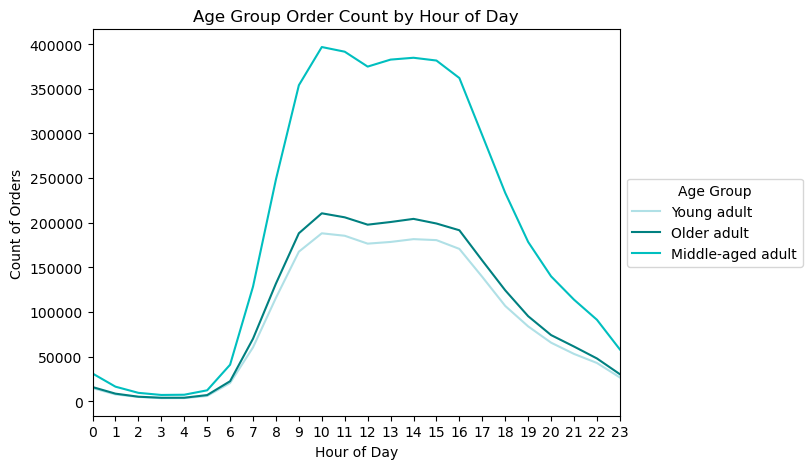

In [116]:
# Create line plot that shows customer age group by hour of day

age_group_hour_of_day_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='order_id', estimator='count', hue='age_group', palette =['powderblue', 'teal', 'c'], errorbar=None)

plt.title('Age Group Order Count by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Count of Orders')
plt.legend(title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: Interestingly, there are no significant differences in age groups across order time of day. This is contrary to stereotypes about daily schedules for different aged adults.

In [117]:
# Export figure

age_group_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_hour_of_day_line.png'), bbox_inches='tight')

## Age and expenditure

In [144]:
#check value counts

crosstab_age_expenditure_hour_of_day = instacart_all.groupby(['order_hour_of_day','age_group']).agg({'prices':['mean']})

In [145]:
crosstab_age_expenditure_hour_of_day

prices
                                         mean
order_hour_of_day age_group                  
0                 Middle-aged adult  7.833378
                  Older adult        7.803312
                  Young adult        7.776527
1                 Middle-aged adult  7.805260
                  Older adult        7.809743
...                                       ...
22                Older adult        7.827590
                  Young adult        7.815043
23                Middle-aged adult  7.816151
                  Older adult        7.788713
                  Young adult        7.762867

[72 rows x 1 columns]

In [146]:
crosstab_age_expenditure_hour_of_day.to_clipboard()

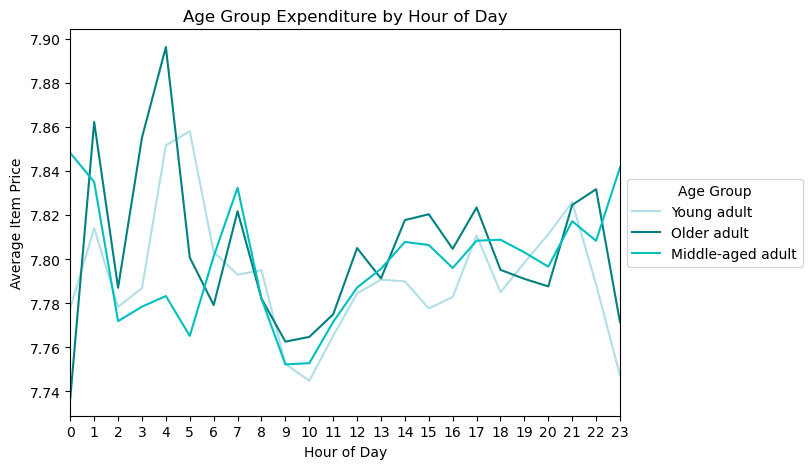

In [142]:
# Create line plot that shows customer age expenditure by hour of day

age_group_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='age_group', palette =['powderblue', 'teal', 'c'], errorbar=None)

plt.title('Age Group Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: Average item prices are volatile for all age groups throughout the day. Even though Middle-aged adults have the highest overall order count, older adults have a slightly higher average expenditure.

Older adults have the highest average item price at 1am and 4am and lowest average item price at midnight. 
Middle-aged adults peak in expenditure at between 11pm and midnight.
Young adults peak in expenditure at 5am and 4am.

All three age groups dip in expenditure between 9am and 11am, which is when order counts are highest.

This is very interesting because older and younger adults buy the most expensive items early in the morning. Further analysis on which items are purchased during those hours could help boost order counts for them.

In [147]:
# Export figure

age_group_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_expenditure_line.png'), bbox_inches='tight')

# 13. Family status profiling continued

In [5]:
# Check status of columns and variables

instacart_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'region', 'customer_activity', 'department', 'top_depart',
       'age_group', 'age_marital_group', 'spending_power_group'],
      dtype='object')

In [6]:
# Summary stats by customer marital status

marital_stats_crosstab = instacart_all.groupby('marital_status').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [7]:
marital_stats_crosstab

order_id max_order                 \
                                     count       min       mean max   
marital_status                                                        
divorced/widowed                   2645271         5  34.710676  99   
living with parents and siblings   1481172         5  34.853070  99   
married                           21743711         5  34.307533  99   
single                             5094410         5  34.657749  99   

                                 order_day_of_week order_hour_of_day prices  \
                                            median            median    min   
marital_status                                                                
divorced/widowed                               3.0              13.0    1.0   
living with parents and siblings               3.0              13.0    1.0   
married                                        3.0              13.0    1.0   
single                                         3.0              13.0    1.0   

                                                  
                                      mean   max  
marital_status                                    
divorced/widowed                  7.801014  25.0  
living with parents and siblings  7.800604  25.0  
married                           7.790278  25.0  
single                            7.783597  25.0

In [8]:
marital_stats_crosstab.to_clipboard()

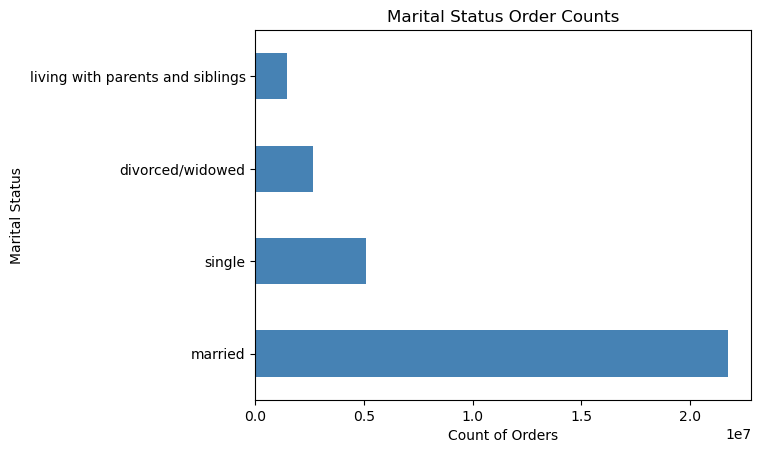

In [132]:
marital_stats_barh = instacart_all['marital_status'].value_counts().plot.barh(color = 'steelblue')
                                                            
plt.title('Marital Status Order Counts')
plt.xlabel('Count of Orders')
plt.ylabel('Marital Status')
plt.legend().remove()

Observations: The majority of customers are married, making up more than all of the other marital status' combined.

In [133]:
# Export figure

marital_stats_barh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_stats_barh.png'), bbox_inches='tight')

In [11]:
# Examine frequency differences across marital status

marital_frequency_crosstab = pd.crosstab(instacart_all['marital_status'], instacart_all['frequency_flag'], dropna = False)

In [12]:
marital_frequency_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1677436,429754,538081
living with parents and siblings,941347,240680,299145
married,13711687,3570533,4461491
single,3209965,833877,1050568


## Marital status and hour of day

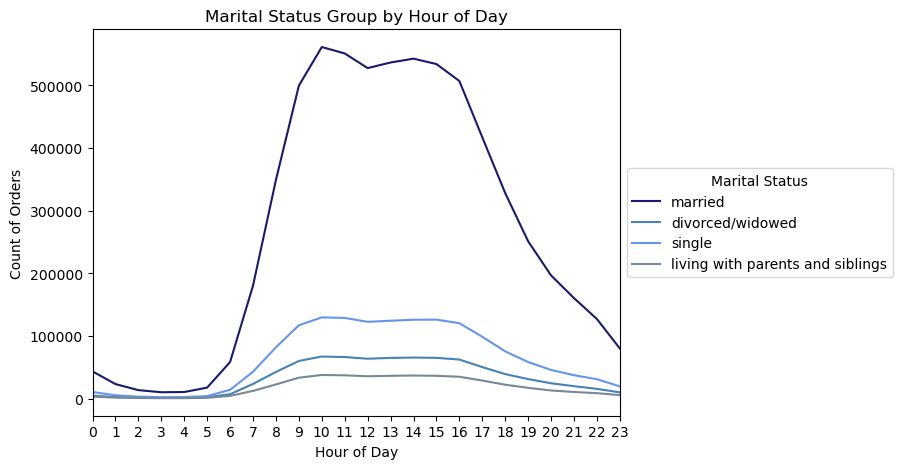

In [122]:
# Create line plot that shows customer marital status by hour of day

marital_status_hour_of_day_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='order_id', estimator='count', hue='marital_status', palette =['midnightblue', 'steelblue', 'cornflowerblue', 'lightslategray'], errorbar=None)

plt.title('Marital Status Group by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Count of Orders')
plt.legend(title='Marital Status', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: All marital status groups follow a similar flow of orders throughout the day. Order counts across marital status groups are the most similar (and also at their lowest values) between 2am and 5am. Between 8am and noon is when there are the widest gaps in order counts across age groups.

In [123]:
#Export figure

marital_status_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_hour_of_day_line.png'), bbox_inches='tight')

## Martial status and expenditure

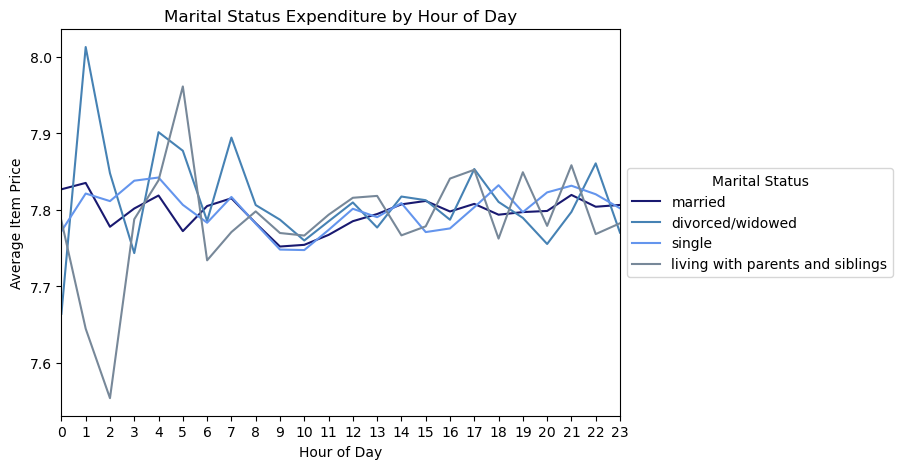

In [148]:
# Create line plot that shows expenditure for marital status groups across hour of day

marital_status_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='marital_status', palette =['midnightblue', 'steelblue', 'cornflowerblue', 'lightslategray'], errorbar=None)

plt.title('Marital Status Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(title='Marital Status', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: Customers who are divorced/widowed and customers who are living with parents and siblings show the greatest spread in average item price throughout the day.

Married and single customers follow similar spending patterns.
Divorced/widowed and customers living with parents and siblings follow a mix of inverse and simlilar spikes and dips in spending.

The greatest difference in spending by marital status is between midnight a 2am, when divorced/widowed customers purchase the highest average priced items and customers who are living with parents and siblings place the lowest average priced items.

In [149]:
#Export figure

marital_status_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_expenditure_line.png'), bbox_inches='tight')

# Marital status and day of week

In [125]:
insta_small_marital_dow_crosstab=  pd.crosstab(insta_small['order_day_of_week'], insta_small['marital_status'], dropna = False)

In [126]:
insta_small_marital_dow_crosstab

marital_status,divorced/widowed,living with parents and siblings,married,single
order_day_of_week,,,,
0,150415,83963,1245215,291966
1,138158,77578,1135982,271345
2,103279,57558,848307,197355
3,94611,52156,773820,180882
4,92080,51984,764791,179597
5,104002,58373,847409,199804
6,110751,61776,908320,206991


Observations: Married customers show the most variation in order counts across days of week. All marital status groups show a similar pattern in orders as the overall customer data frame.

In [33]:
insta_small_marital_dow_crosstab.columns

Index(['divorced/widowed', 'living with parents and siblings', 'married',
       'single'],
      dtype='object', name='marital_status')

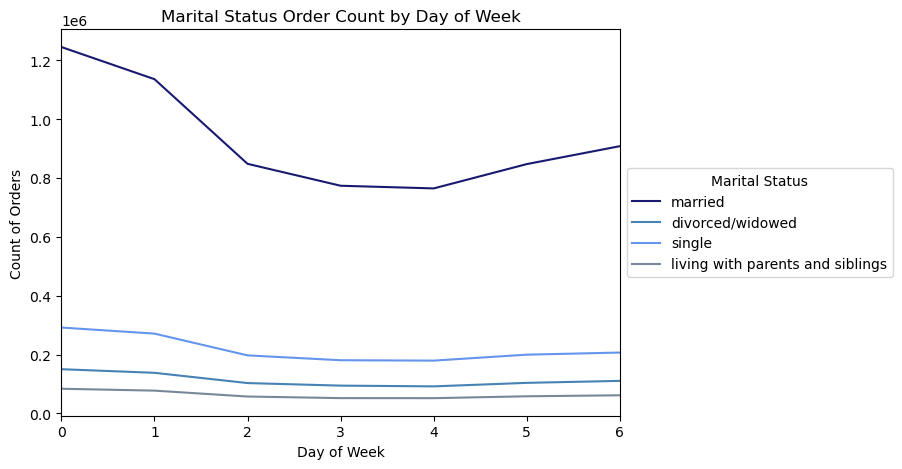

In [127]:
# Create line plot that shows customer order count for marital groups by day of week

marital_status_day_of_week_line = sns.lineplot(data= insta_small, x='order_day_of_week', y='order_id', estimator='count', hue='marital_status', palette =['midnightblue', 'steelblue', 'cornflowerblue', 'lightslategray'], errorbar=None)

plt.title('Marital Status Order Count by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.xlim(xmin=0, xmax=6)
plt.locator_params('x', nbins= 7)
plt.ylabel('Count of Orders')
plt.legend(title='Marital Status', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: Customers living with parents and siblings and who are divorced/widowed have the most consistent ordering counts throughout the week. Customers across marital status groups follow simililar order count flow across days of the week.

In [128]:
# Export figure

marital_status_day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_day_of_week_line.png'), bbox_inches='tight')

## Create value groupings for family status by dependants

While analysis from above showed that age and number of dependants were not significantly correlated and therefore the value grouping with age was focused on marital status, there is another way to factor in dependants. Intuitively, people who have dependants and living alone could have different needs than people with dependants with other adult help at home. Similarly, the ordering habbits of customers with dependants could be different than those without dependants (removing the age factor). I will create dependant/not groups as well as caregiver status groups to examine any trends in family/home makeup. It's also possible that income and dependants could be related to order habbits. 

In [112]:
# Create dependants flag

instacart_all.loc[(instacart_all['number_of_dependants'] >0), 'dependant_flag'] = 'Has dependants'

In [113]:
instacart_all.loc[(instacart_all['number_of_dependants'] ==0), 'dependant_flag'] = 'No dependants'

In [114]:
instacart_all['dependant_flag'].value_counts()

Has dependants    23224883
No dependants      7739681
Name: dependant_flag, dtype: int64

In [115]:
crosstab_check =  pd.crosstab(instacart_all['number_of_dependants'], instacart_all['dependant_flag'], dropna = False) 

In [116]:
crosstab_check

dependant_flag,Has dependants,No dependants
number_of_dependants,,
0,0,7739681
1,7719106,0
2,7733261,0
3,7772516,0


In [117]:
dependants_stats_crosstab = instacart_all.groupby('dependant_flag').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [119]:
dependants_stats_crosstab

order_id max_order                order_day_of_week  \
                   count       min       mean max            median   
dependant_flag                                                        
Has dependants  23224883         5  34.342325  99               3.0   
No dependants    7739681         5  34.675839  99               3.0   

               order_hour_of_day prices                  
                          median    min      mean   max  
dependant_flag                                           
Has dependants              13.0    1.0  7.790937  25.0  
No dependants               13.0    1.0  7.789550  25.0

In [120]:
dependants_stats_crosstab.to_clipboard()

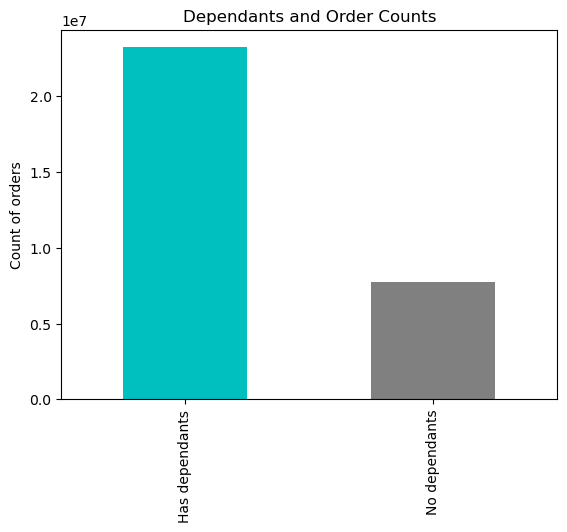

In [142]:
dependants_counts_bar = instacart_all['dependant_flag'].value_counts().plot.bar(color = ['c','grey'])
                                                            
plt.title('Dependants and Order Counts')
plt.ylabel('Count of orders')
plt.legend().remove()
                                                                                         

Observations: The majority of customers have dependants (75%). There is an even spread amongs each of the number of dependant values (approximately 25% each value). The groups have nearly the same mean number of orders and mean item prices.

In [143]:
# Export figure

dependants_counts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_counts_bar.png'), bbox_inches='tight')

## Dependant group and expenditure

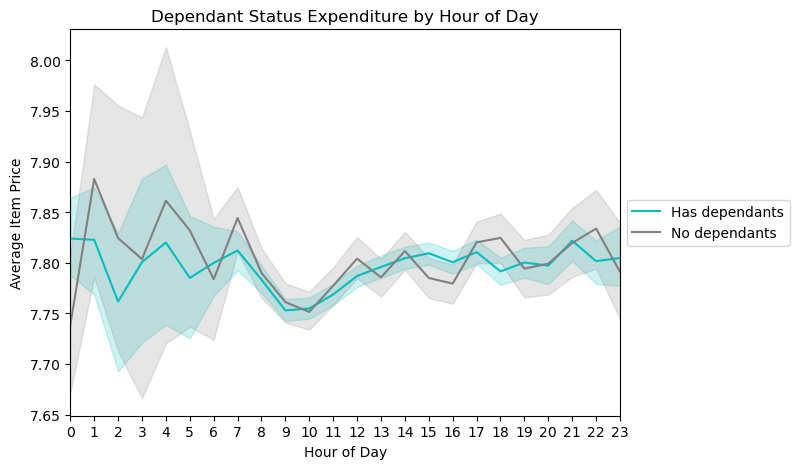

In [41]:
# Examine trends in expenditure based on dependant_flag trhough a line plot across hour of day

dependant_flag_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='dependant_flag', palette =['c', 'gray'])

plt.title('Dependant Status Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations:There is an inverse correlation in customers who have dependants and no dependants between midnight and 3am, then they slowly progress to follow very similar average item price trends throughout the rest of the day. 

Customers with no dependants spend the money (and more than people with dependants) between midnight and 7am.

Customers with dependants spend the most money at 4am, 7am, and 9pm. 

The lowest expenditure for both groups occurs between 9am and 11am.

In [42]:
# Export figure

dependant_flag_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_flag_expenditure_line.png'), bbox_inches='tight')

## Dependand group and department preferences

In [130]:
# Look for differences in department preference

crosstab_depend_departments = pd.crosstab(instacart_all['department'], instacart_all['dependant_flag'], dropna = False) 

In [131]:
crosstab_depend_departments

dependant_flag,Has dependants,No dependants
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


In [132]:
crosstab_depend_departments = crosstab_depend_departments.sort_values(['Has dependants'], ascending = False)

In [133]:
crosstab_depend_departments

dependant_flag,Has dependants,No dependants
department,,
produce,6803832,2275441
dairy eggs,3882806,1294376
snacks,2075968,690438
beverages,1926560,645341
frozen,1592383,529348
pantry,1338801,443904
bakery,839433,281395
canned goods,761054,251020
deli,750452,253382


In [137]:
crosstab_depend_departments.to_clipboard()

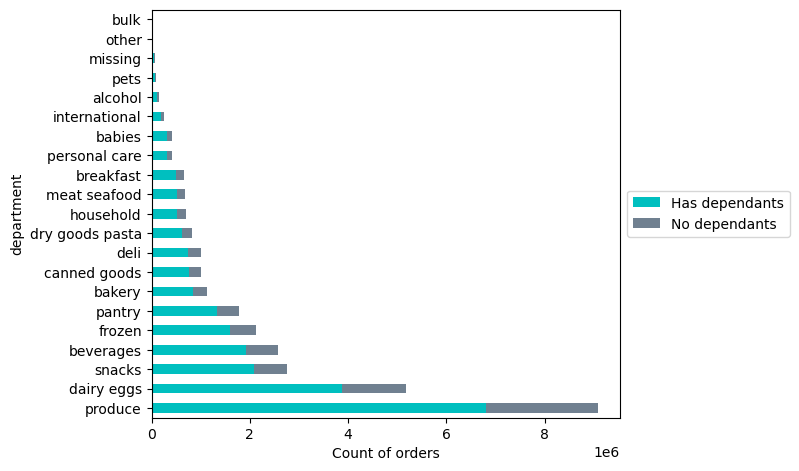

In [141]:
dependants_depart_barh = crosstab_depend_departments.plot.barh(stacked=True, color=['c', 'slategrey'])

plt.tight_layout()                                                              
plt.xlabel('Count of orders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))                                                           
                         

Observations:  Customers with dependants make more orders than customers with no dependants in every department category. Customers with and without dependants show the same order count ratios across all departments, which also match the approximate 75/25 ratios. Both groups have very similar rankings of department order numbers. However, customers with dependants make up the majority of orders in every department. Customers with dependants have slightly higher ratios of orders made within household and bulk departments.

In [144]:
# Export figure

dependants_depart_barh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_depart_barh.png'), bbox_inches='tight')

The final grouping for family status will be based on raising children (or supporting an adult dependant) alone vs. with other adults in the home. This could impact various variables due to family needs.

In [148]:
instacart_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'region', 'customer_activity', 'department', 'top_depart',
       'age_group', 'age_marital_group', 'spending_power_group',
       'dependant_flag'],
      dtype='object')

## Examine caregiver status (living situation and dependants)

This aspect of analysis is based on the idea that people who are single/living alone and who also have dependants might have different ordering habbits than those who have help or those without kids.

In [149]:
# Create value groupings for caregiver status

instacart_all.loc[(instacart_all['marital_status'].isin(['married','living with parents and siblings'])) & (instacart_all['dependant_flag'] =='No dependants'), 'caregiver_status'] = 'Cohabitating noncaregiver'

In [150]:
instacart_all.loc[(instacart_all['marital_status'].isin(['married','living with parents and siblings'])) & (instacart_all['dependant_flag'] =='Has dependants'), 'caregiver_status'] = 'Cohabitating caregiver'

In [151]:
instacart_all.loc[(instacart_all['marital_status'].isin(['single','divorced/widowed'])) & (instacart_all['dependant_flag'] =='No dependants'), 'caregiver_status'] = 'Solo living noncaregiver'

In [152]:
instacart_all.loc[(instacart_all['marital_status'].isin(['single','divorced/widowed'])) & (instacart_all['dependant_flag'] =='Has dependants'), 'caregiver_status'] = 'Solo living caregiver'

In [153]:
# Check new column values

instacart_all['caregiver_status'].value_counts (dropna = False)

Cohabitating caregiver      23224883
Solo living noncaregiver     7739681
Name: caregiver_status, dtype: int64

In [157]:
caregiver_check = pd.crosstab(instacart_all['dependant_flag'], instacart_all['marital_status'], dropna = False) 

In [158]:
caregiver_check

marital_status,divorced/widowed,living with parents and siblings,married,single
dependant_flag,,,,
Has dependants,0,1481172,21743711,0
No dependants,2645271,0,0,5094410


In [159]:
caregiver_check.to_clipboard()

In [160]:
caregiver_check_2 = pd.crosstab(instacart_all['number_of_dependants'], instacart_all['marital_status'], dropna = False) 

In [161]:
caregiver_check_2

marital_status,divorced/widowed,living with parents and siblings,married,single
number_of_dependants,,,,
0,2645271,0,0,5094410
1,0,508045,7211061,0
2,0,484658,7248603,0
3,0,488469,7284047,0


In [156]:
instacart_all['dependant_flag'].value_counts (dropna = False)

Has dependants    23224883
No dependants      7739681
Name: dependant_flag, dtype: int64

Observation: There are no customers who live alone and are caregivers and no customers who have dependants and live alone. This was suprising and therefore checked above through the crosstab of marital_status and dependant_flag and again with number_of_dependants.

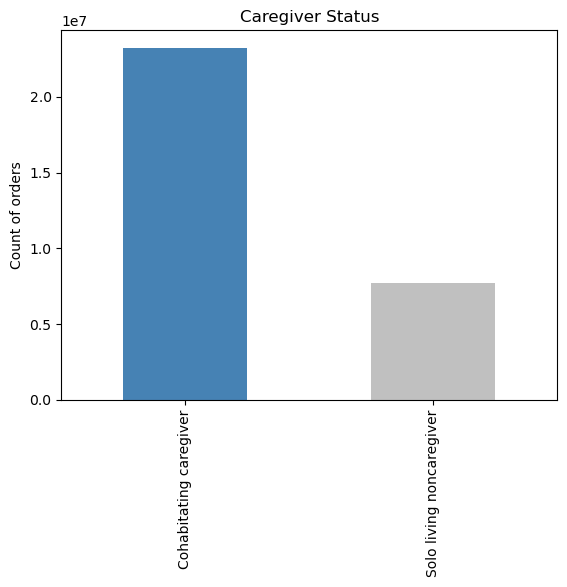

In [155]:
# Create bar chart based on caregiver status

caregiver_bar = instacart_all['caregiver_status'].value_counts().plot.bar(color = ['steelblue','silver'])
                                                            
plt.title('Caregiver Status')
plt.ylabel('Count of orders')
plt.legend().remove()

In [162]:
# Export figure

caregiver_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'caregiver_bar.png'), bbox_inches='tight')

In [163]:
# Run summary stats between groups

caregiver_summary_stats_crosstab = instacart_all.groupby('caregiver_status').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [164]:
caregiver_summary_stats_crosstab

order_id max_order                order_day_of_week  \
                             count       min       mean max            median   
caregiver_status                                                                
Cohabitating caregiver    23224883         5  34.342325  99               3.0   
Solo living noncaregiver   7739681         5  34.675839  99               3.0   

                         order_hour_of_day prices                  
                                    median    min      mean   max  
caregiver_status                                                   
Cohabitating caregiver                13.0    1.0  7.790937  25.0  
Solo living noncaregiver              13.0    1.0  7.789550  25.0

In [165]:
caregiver_summary_stats_crosstab.to_clipboard()

There are no customers who live alone and are caregivers and no customers who have dependants and live alone. This was suprising and therefore checked above through the crosstab of marital_status and dependant_flag and again with number_of_dependants. This also shows a gap in the user market, because the overall population in the United States has solo living caregivers (single parents) and cohabitating noncaregivers (married people without adults, etc).

In [168]:
caregiver_dow_crosstab = pd.crosstab(instacart_all['order_day_of_week'], instacart_all['caregiver_status'], dropna = False)

In [169]:
caregiver_dow_crosstab

caregiver_status,Cohabitating caregiver,Solo living noncaregiver
order_day_of_week,,
0,4431532,1477078
1,4049336,1362350
2,3022125,1002581
3,2752493,917042
4,2719735,905259
5,3019555,1014174
6,3230107,1061197


## Caregiver status and day of week

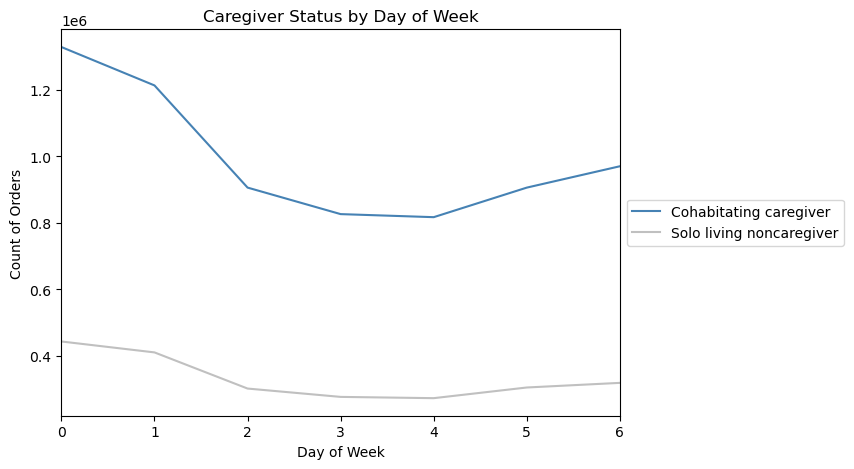

In [136]:
# Create line plot that shows customer order count for caregiver status by day of week

caregiver_dow_line = sns.lineplot(data= insta_small, x='order_day_of_week', y='order_id', estimator='count', hue='caregiver_status', palette =['steelblue','silver'], errorbar=None)

plt.title('Caregiver Status by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.xlim(xmin=0, xmax=6)
plt.locator_params('x', nbins= 7)
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: Caregiver status groups follow similar order count flows across day of week and allign with overall order count trends.

In [137]:
# Export figure

caregiver_dow_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'caregiver_dow_bar.png'), bbox_inches='tight')

In [174]:
caregiver_hour_of_day_crosstab = pd.crosstab(instacart_all['order_hour_of_day'], instacart_all['caregiver_status'], dropna = False)

## Caregiver status and time of day

In [175]:
caregiver_hour_of_day_crosstab

caregiver_status,Cohabitating caregiver,Solo living noncaregiver
order_hour_of_day,,
0,156608,51434
1,82890,26731
2,48959,16732
3,36421,12375
4,38558,12205
5,63134,21284
6,210143,70870
7,643142,220071
8,1243163,415947


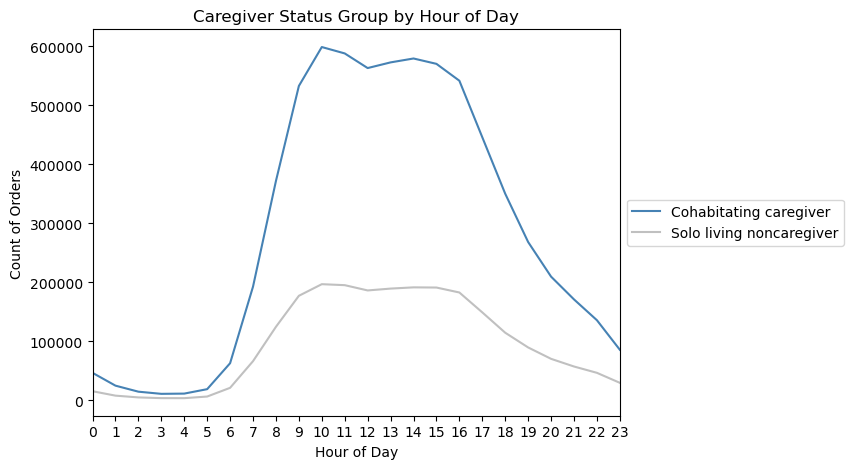

In [138]:
# Create line plot that shows caregiver status by hour of day

caregiver_status_hour_of_day_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='order_id', estimator='count', hue='caregiver_status', palette =['steelblue','silver'], errorbar=None)

plt.title('Caregiver Status Group by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Count of Orders')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: The largest gap in order counts between cohabitating caregivers and solo living noncaregivers is around 9am. Both groups follow similar trends in order counts throughout the day and make the most orders between 9am and 4pm, with peaks between 9am and 10am, and the least orders between 1am and 5am.

In [139]:
# Export figure

caregiver_status_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'caregiver_status_hour_of_day_line.png'), bbox_inches='tight')

## Caregiver status expenditure

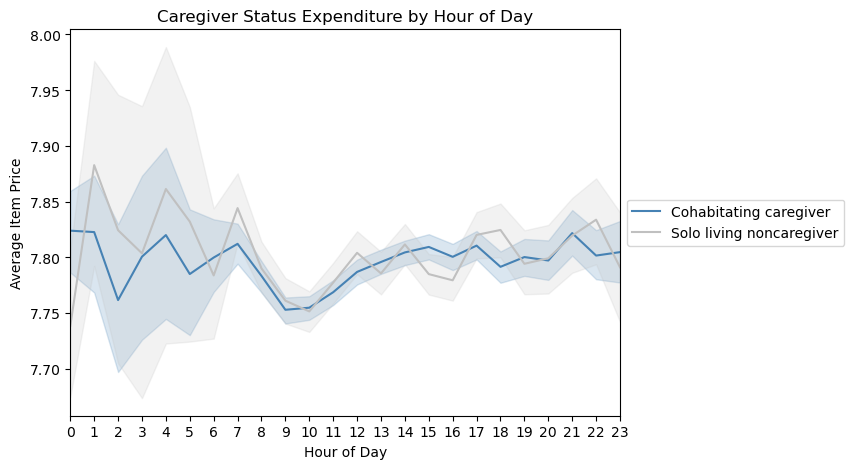

In [43]:
# Create line plot that shows caregiver status expenditure by hour of day

caregiver_status_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='caregiver_status', palette =['steelblue','silver'])

plt.title('Caregiver Status Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Note: this line plot follows the trends for dependant flag and expenditure due to the correlation between dependants and caregiver status.

In [44]:
# Export figure

caregiver_status_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'caregiver_status_expenditure_line.png'), bbox_inches='tight')

## Caregiver status and expenditure

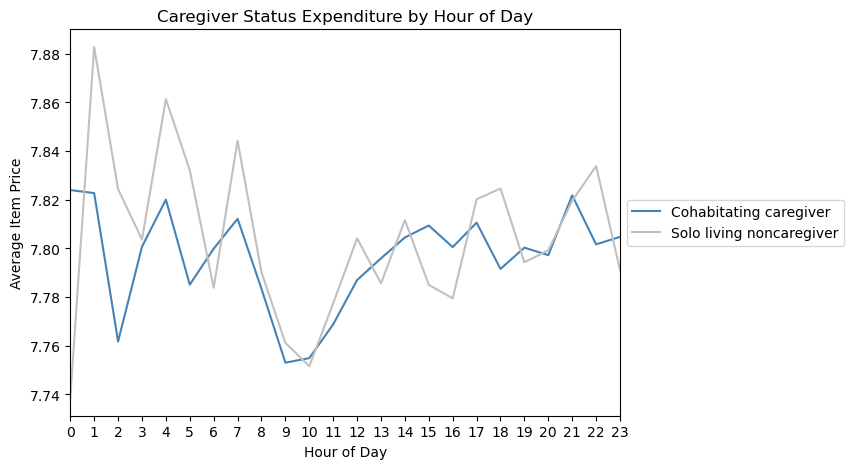

In [140]:
# Create line plot that shows caregiver status spending by hour of day

caregiver_status_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='caregiver_status', palette =['steelblue','silver'], errorbar=None)

plt.title('Caregiver Status Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations:Since caregiver status matches number of dependants, their expenditures visualizations match exactly.

In [ ]:
# Export figure

caregiver_status_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'caregiver_status_expenditure_line.png'), bbox_inches='tight')

# 14. Income Profiling Continued

Note: The below income groupings are different than the "spending power" income groups, which were specifically created to analyze age and income trends. The groupings below are constructed based on income spread for all customers.

Below will use the following parameters:

Lower income : < 100,000
Middle income >+ 100,000 and <200,000
High income: >=200,000

As previously noted, these groupings do not match technical categories for socioeconomic status groupings in the United States. Rather, they are based on Instacart customers. One trend to note is that Instacart has a large gap of low income customers since the min customer income is 25,903. That is an area of future exploration.

## Create income groupings

Note: need to do this for both instacart_all and insta_small sample

In [46]:
# Split into lower, middle, and high income groups for larger instacart_all df

instacart_all.loc[instacart_all['income'] <100000, 'income_group_loc'] = 'Lower income'

In [47]:
instacart_all.loc[(instacart_all['income'] >=100000) & (instacart_all['income'] <200000), 'income_group_loc'] = 'Middle income'

In [48]:
instacart_all.loc[instacart_all['income'] >=200000, 'income_group_loc'] = 'High income'

In [51]:
instacart_all['income_group_loc'].value_counts(dropna = False)

Lower income     16757162
Middle income    13953260
High income        254142
Name: income_group_loc, dtype: int64

Accurate column derivation, sum equals the instacart_all df row count

In [65]:
# Split into lower, middle, and high income groups for small random sample

insta_small.loc[insta_small['income'] <100000, 'income_group_loc'] = 'Lower income'

In [67]:
insta_small.loc[(insta_small['income'] >=100000) & (insta_small['income'] <200000), 'income_group_loc'] = 'Middle income'

In [68]:
insta_small.loc[insta_small['income'] >=200000, 'income_group_loc'] = 'High income'

In [69]:
# Check value counts
insta_small['income_group_loc'].value_counts(dropna = False)

Lower income     5026113
Middle income    4186014
High income        76341
Name: income_group_loc, dtype: int64

In [71]:
insta_small.shape

(9288468, 40)

Accurate groupings, value count sum matches insta_small shape

## Summary stats for income groups

In [53]:
crosstab_income_stats = instacart_all.groupby('income_group_loc').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [54]:
crosstab_income_stats

order_id max_order                order_day_of_week  \
                     count       min       mean max            median   
income_group_loc                                                        
High income         254142         5  38.274268  99               3.0   
Lower income      16757162         5  34.294917  99               3.0   
Middle income     13953260         5  34.512639  99               3.0   

                 order_hour_of_day prices                  
                            median    min      mean   max  
income_group_loc                                           
High income                   13.0    1.0  7.777393  25.0  
Lower income                  13.0    1.0  7.652564  25.0  
Middle income                 13.0    1.0  7.956613  25.0

In [58]:
crosstab_income_stats = crosstab_income_stats.sort_values(by=[('order_id', 'count')], ascending = False)

In [62]:
crosstab_income_stats

order_id max_order                order_day_of_week  \
                     count       min       mean max            median   
income_group_loc                                                        
Lower income      16757162         5  34.294917  99               3.0   
Middle income     13953260         5  34.512639  99               3.0   
High income         254142         5  38.274268  99               3.0   

                 order_hour_of_day prices                  
                            median    min      mean   max  
income_group_loc                                           
Lower income                  13.0    1.0  7.652564  25.0  
Middle income                 13.0    1.0  7.956613  25.0  
High income                   13.0    1.0  7.777393  25.0

In [63]:
crosstab_income_stats.to_clipboard()

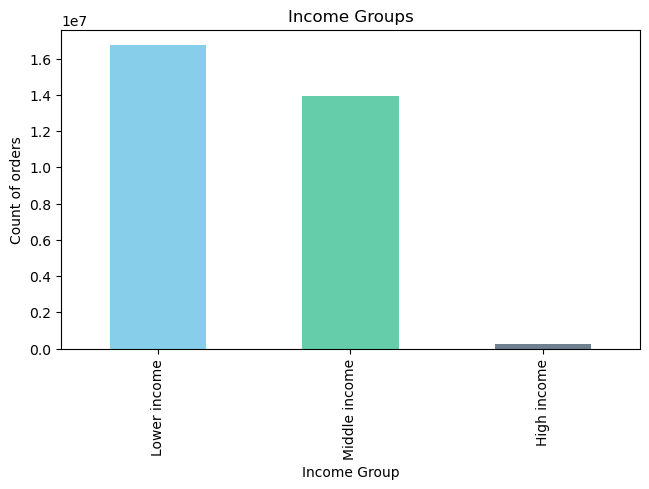

In [52]:
# Create bar chart showing income group order counts

income_bar = instacart_all['income_group_loc'].value_counts().plot.bar(color = ['skyblue', 'mediumaquamarine','slategray'])
                                                            
plt.title('Income Groups')
plt.tight_layout()
plt.ylabel('Count of orders')
plt.xlabel('Income Group')
plt.legend().remove()

Observations: The majority of customer orders are made by lower income customers, with income between 25,000 and 100,000.
Low income makes up 54 percent of orders, middle income makes up 45 percent of orders, and high income customers make up only 1 percent of order counts.

In [64]:
# Export figure

income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_bar.png'), bbox_inches='tight')

## Examine income by day of week and time of day

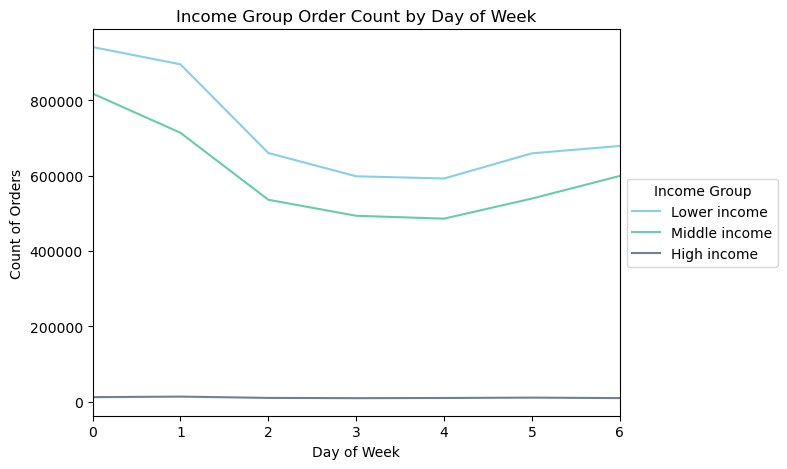

In [76]:
# Create line plot that shows customer order count for income by day of week

income_dow_line = sns.lineplot(data=insta_small, x='order_day_of_week', y='order_id', estimator='count', hue='income_group_loc', palette =['skyblue', 'mediumaquamarine','slategray'], errorbar=None)

plt.title('Income Group Order Count by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.xlim(xmin=0, xmax=6)
plt.locator_params('x', nbins= 7)
plt.ylabel('Count of Orders')
plt.legend(title='Income Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

# using small sf sample due to line plot and memory usage

Observations: While High income order counts do fluctuate throughout the day, their small size relative to the other two groups makes their line appear straight. Lower and Middle income groups follow the same ordering count patterns throughout the week. 

In [77]:
# Export figure

income_dow_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dow_line.png'), bbox_inches='tight')

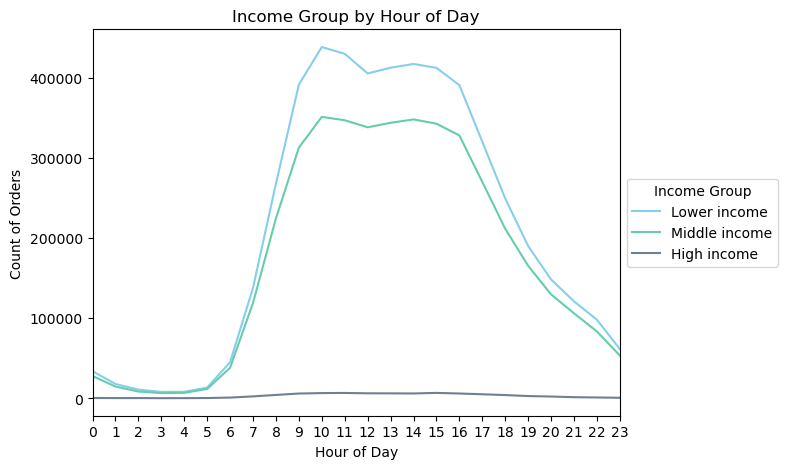

In [78]:
# Create line plot that shows income group by hour of day

income_group_hour_of_day_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='order_id', estimator='count', hue='income_group_loc', palette =['skyblue', 'mediumaquamarine','slategray'], errorbar=None)

plt.title('Income Group by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Count of Orders')
plt.legend(title='Income Group',loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: There does not appear to be significant differences in count of orders across hour of day based on income groups.

In [79]:
# Export figure

income_group_hour_of_day_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_hour_of_day_line.png'), bbox_inches='tight')

## Income and expenditure

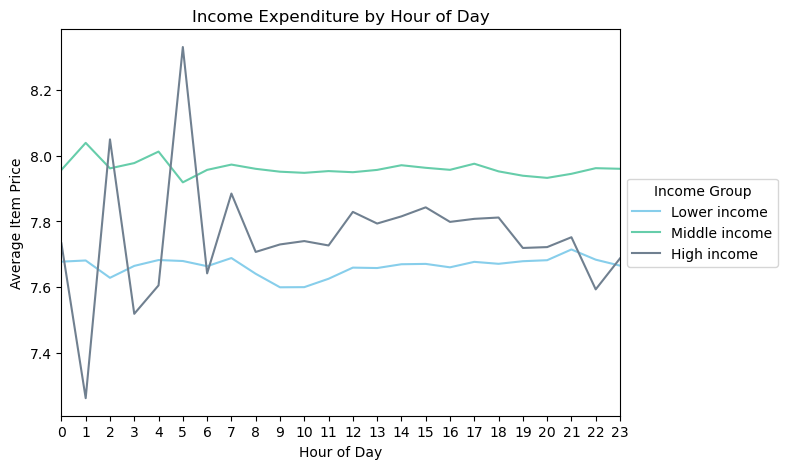

In [80]:
# Create line plot that shows income group spending by hour of day

income_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='income_group_loc', palette=['skyblue', 'mediumaquamarine','slategray'], errorbar=None)

plt.title('Income Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(title='Income Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: There are differences in spending patterns throughout the day based on income groups. 

Lower income and middle income customers follow similar patterns, with Middle income customers spending more than Lower in equal portions. These income groups average item prices remain relatively stable even at the peak order count time, between 9am and 5pm. The two peak times for middle income spenders are 1am and 4am, with a drop at 5am.

The two peak times for lower income spenders are 7am and 21, with drops between 7am and 9am.

High income customers show the most volatility in average item price. They peak at 2am and 5am, and dip at 1am.

Spending patterns do not mirror overall order count patterns, suggesting that customers across income groups buying higher priced items is not correlated with buying more items. 

In [81]:
# Export figure

income_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_expenditure_line.png'), bbox_inches='tight')

## Product preferences across income groups

In [109]:
crosstab_income_depart = pd.crosstab(instacart_all['department'], instacart_all['income_group_loc'], dropna = False)

In [113]:
crosstab_income_depart

income_group_loc,High income,Lower income,Middle income
department,,,
alcohol,6127,75485,63015
babies,2104,213688,194600
bakery,12604,593117,515107
beverages,24661,1445439,1101801
breakfast,6529,373254,291067
bulk,27,19233,14191
canned goods,9089,526821,476164
dairy eggs,44307,2770971,2361904
deli,7308,541735,454791


In [115]:
crosstab_income_products = crosstab_income_products.sort_values(by=['Lower income'], ascending=False)

In [116]:
crosstab_income_products

income_group_loc,High income,Lower income,Middle income
department,,,
produce,49393,4842271,4187609
dairy eggs,44307,2770971,2361904
snacks,22952,1661805,1081649
beverages,24661,1445439,1101801
frozen,19852,1133231,968648
pantry,15876,942741,824088
bakery,12604,593117,515107
deli,7308,541735,454791
canned goods,9089,526821,476164


In [117]:
crosstab_income_products.to_clipboard()

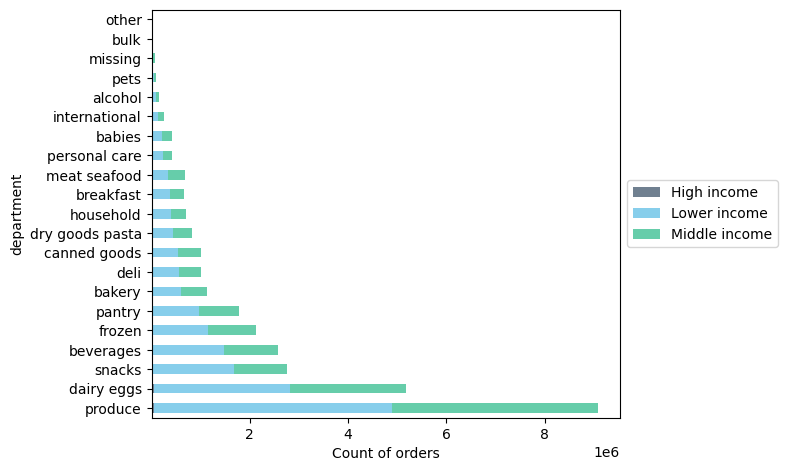

In [121]:
# Create stacked horizonatl bar chart showing department trends from income

crosstab_income_products_barh = crosstab_income_products.plot.barh(stacked=True, color=['slategray', 'skyblue', 'mediumaquamarine'])

plt.tight_layout()                                                              
plt.xlabel('Count of orders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))   

In [122]:
# Export figure

crosstab_income_products_barh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'crosstab_income_products_barh.png'), bbox_inches='tight')

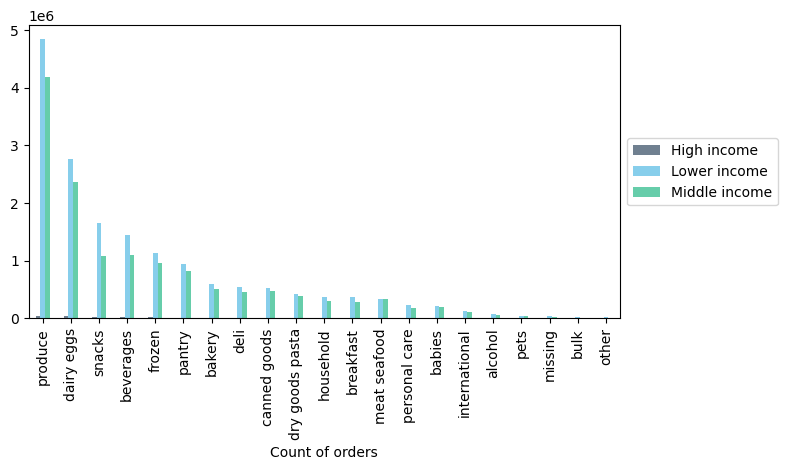

In [123]:
# Create bar chart to see if better visual for same data

crosstab_income_products_bar = crosstab_income_products.plot.bar(color=['slategray', 'skyblue', 'mediumaquamarine'])

plt.tight_layout()                                                              
plt.xlabel('Count of orders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Observations: 'Lower income' customers have greater order counts across all departments. Middle customers have almost the same percentage of orders as 'Lower income' customers in 'meat seafood' department. High income customers have the least orders in all departments. Each income group's top department preference is as follows:
Lower income: 'snacks'
Miiddle income: 'meat seafood'
High income: 'alcohol'

In [129]:
# Export figure

crosstab_income_products_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_products_bar.png'), bbox_inches='tight')

## Examine impact of number of dependants and income on customer behavior

In [89]:
# Create value groupings for dependants and income in instacart_all df

instacart_all.loc[(instacart_all['dependant_flag']== 'No dependants') & (instacart_all['income_group_loc'] =='Lower income'), 'dependants_and_income'] = 'No dependants, lower income'

In [83]:
instacart_all.loc[(instacart_all['dependant_flag']== 'No dependants') & (instacart_all['income_group_loc'] =='Middle income'), 'dependants_and_income'] = 'No dependants, middle income'

In [84]:
instacart_all.loc[(instacart_all['dependant_flag']== 'No dependants') & (instacart_all['income_group_loc'] =='High income'), 'dependants_and_income'] = 'No dependants, high income'

In [90]:
instacart_all.loc[(instacart_all['dependant_flag']== 'Has dependants') & (instacart_all['income_group_loc'] =='Lower income'), 'dependants_and_income'] = 'Has dependants, lower income'

In [86]:
instacart_all.loc[(instacart_all['dependant_flag']== 'Has dependants') & (instacart_all['income_group_loc'] =='Middle income'), 'dependants_and_income'] = 'Has dependants, middle income'

In [87]:
instacart_all.loc[(instacart_all['dependant_flag']== 'Has dependants') & (instacart_all['income_group_loc'] =='High income'), 'dependants_and_income'] = 'Has dependants, high income'

In [91]:
# Check value counts

instacart_all['dependants_and_income'].value_counts(dropna=False)

Has dependants, lower income     12586437
Has dependants, middle income    10448910
No dependants, lower income       4170725
No dependants, middle income      3504350
Has dependants, high income        189536
No dependants, high income          64606
Name: dependants_and_income, dtype: int64

In [92]:
# Create value groupings for dependants and income in small random 70/30 sample

insta_small.loc[(insta_small['dependant_flag']== 'No dependants') & (insta_small['income_group_loc'] =='Lower income'), 'dependants_and_income'] = 'No dependants, lower income'

In [93]:
insta_small.loc[(insta_small['dependant_flag']== 'No dependants') & (insta_small['income_group_loc'] =='Middle income'), 'dependants_and_income'] = 'No dependants, middle income'

In [94]:
insta_small.loc[(insta_small['dependant_flag']== 'No dependants') & (insta_small['income_group_loc'] =='High income'), 'dependants_and_income'] = 'No dependants, high income'

In [95]:
insta_small.loc[(insta_small['dependant_flag']== 'Has dependants') & (insta_small['income_group_loc'] =='Lower income'), 'dependants_and_income'] = 'Has dependants, lower income'

In [96]:
insta_small.loc[(insta_small['dependant_flag']== 'Has dependants') & (insta_small['income_group_loc'] =='Middle income'), 'dependants_and_income'] = 'Has dependants, middle income'

In [97]:
insta_small.loc[(insta_small['dependant_flag']== 'Has dependants') & (insta_small['income_group_loc'] =='High income'), 'dependants_and_income'] = 'Has dependants, high income'

In [98]:
# Check value counts

insta_small['dependants_and_income'].value_counts(dropna=False)

Has dependants, lower income     3775170
Has dependants, middle income    3134925
No dependants, lower income      1250943
No dependants, middle income     1051089
Has dependants, high income        57137
No dependants, high income         19204
Name: dependants_and_income, dtype: int64

## Descriptive stats for income dependant groups

In [99]:
crosstab_dependant_income_stats = instacart_all.groupby('dependants_and_income').agg({'order_id':['count'], 'max_order': ['min', 'mean', 'max'], 'order_day_of_week': ['median'], 'order_hour_of_day': ['median'], 'prices': ['min', 'mean', 'max']}, dropna = False)

In [100]:
crosstab_dependant_income_stats

order_id max_order                 \
                                  count       min       mean max   
dependants_and_income                                              
Has dependants, high income      189536         5  37.414291  99   
Has dependants, lower income   12586437         5  34.317443  99   
Has dependants, middle income  10448910         5  34.316573  99   
No dependants, high income        64606         5  40.797201  99   
No dependants, lower income     4170725         5  34.226938  99   
No dependants, middle income    3504350         5  35.097248  99   

                              order_day_of_week order_hour_of_day prices  \
                                         median            median    min   
dependants_and_income                                                      
Has dependants, high income                 3.0              13.0    1.0   
Has dependants, lower income                3.0              13.0    1.0   
Has dependants, middle income               3.0              13.0    1.0   
No dependants, high income                  3.0              13.0    1.0   
No dependants, lower income                 3.0              13.0    1.0   
No dependants, middle income                3.0              13.0    1.0   

                                               
                                   mean   max  
dependants_and_income                          
Has dependants, high income    7.778149  25.0  
Has dependants, lower income   7.652755  25.0  
Has dependants, middle income  7.957639  25.0  
No dependants, high income     7.775175  25.0  
No dependants, lower income    7.651989  25.0  
No dependants, middle income   7.953552  25.0

In [101]:
crosstab_dependant_income_stats = crosstab_dependant_income_stats.sort_values(by=[('order_id', 'count')], ascending = False)

In [102]:
crosstab_dependant_income_stats

order_id max_order                 \
                                  count       min       mean max   
dependants_and_income                                              
Has dependants, lower income   12586437         5  34.317443  99   
Has dependants, middle income  10448910         5  34.316573  99   
No dependants, lower income     4170725         5  34.226938  99   
No dependants, middle income    3504350         5  35.097248  99   
Has dependants, high income      189536         5  37.414291  99   
No dependants, high income        64606         5  40.797201  99   

                              order_day_of_week order_hour_of_day prices  \
                                         median            median    min   
dependants_and_income                                                      
Has dependants, lower income                3.0              13.0    1.0   
Has dependants, middle income               3.0              13.0    1.0   
No dependants, lower income                 3.0              13.0    1.0   
No dependants, middle income                3.0              13.0    1.0   
Has dependants, high income                 3.0              13.0    1.0   
No dependants, high income                  3.0              13.0    1.0   

                                               
                                   mean   max  
dependants_and_income                          
Has dependants, lower income   7.652755  25.0  
Has dependants, middle income  7.957639  25.0  
No dependants, lower income    7.651989  25.0  
No dependants, middle income   7.953552  25.0  
Has dependants, high income    7.778149  25.0  
No dependants, high income     7.775175  25.0

Observations: People who have dependants and lower income make the most orders. People with no dependants and high income have the highest average number of orders. Customers with dependants and middle income have the highest average item price.

In [103]:
crosstab_dependant_income_stats.to_clipboard()

In [125]:
# export df

instacart_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_all.pkl'))

In [126]:
insta_small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_small.pkl'))

## Income dependant groups and day of week

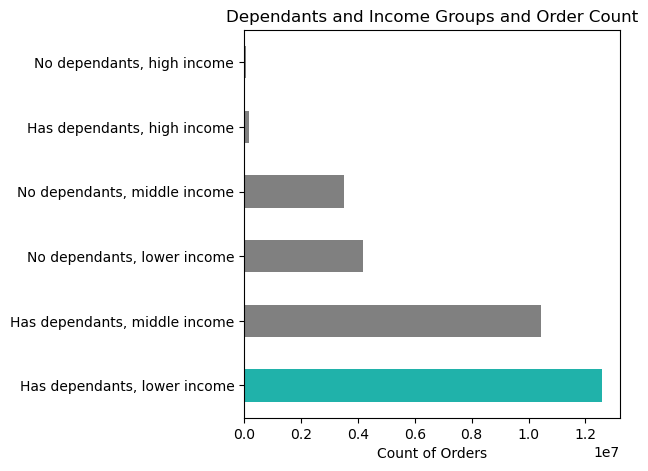

In [139]:
# Create bar chart showing income and dependant group order counts

depend_income_bar = instacart_all['dependants_and_income'].value_counts().plot.barh(color=['lightseagreen','grey', 'grey', 'grey', 'grey','grey'])
                                                            
plt.title('Dependants and Income Groups and Order Count')
plt.tight_layout()
plt.xlabel('Count of Orders')
plt.legend().remove()

In [140]:
# Export figure

depend_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'depend_income_bar.png'), bbox_inches='tight')

## Income dependants and expenditure

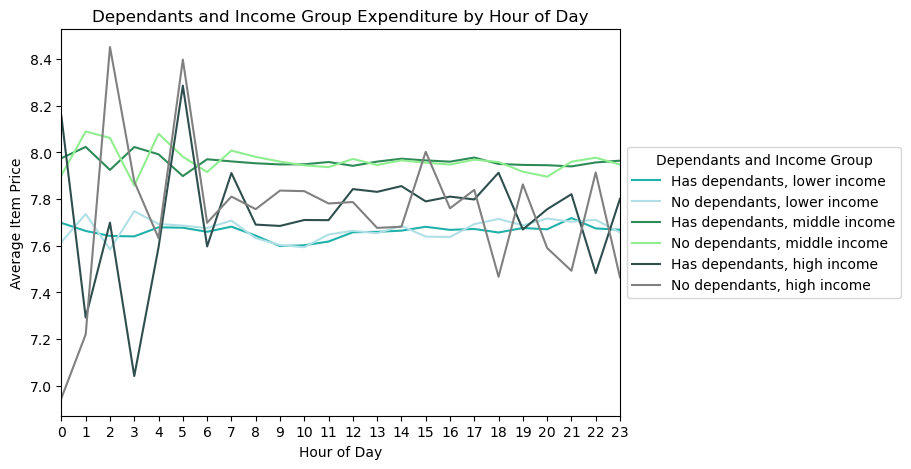

In [142]:
# Create line plot that shows income dependant group spending by hour of day

depend_income_expenditure_line = sns.lineplot(data= insta_small, x='order_hour_of_day', y='prices', estimator='mean', hue='dependants_and_income', palette=['lightseagreen','powderblue', 'seagreen', 'lightgreen', 'darkslategrey','grey'], errorbar=None)

plt.title('Dependants and Income Group Expenditure by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.xlim(xmin=0, xmax=23)
plt.locator_params('x', nbins= 24)
plt.ylabel('Average Item Price')
plt.legend(title='Dependants and Income Group', loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

Observations: Dependant and income groupings pair with the other dependant group based on income, signifying that income is a stronger predictor of expenditure than having dependants or note. Since income analysis for day of week and time of day was already done above, that is sufficient for trends. 

In [143]:
# Export figure

depend_income_expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'depend_income_expenditure_line.png'), bbox_inches='tight')

# 15. Data frame summary

In [6]:
instacart_all.shape

(30964564, 41)

In [5]:
instacart_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'median_last_order', 'frequency_flag', 'sex', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'region', 'customer_activity', 'department', 'top_depart',
       'age_group', 'age_marital_group', 'spending_power_group',
       'dependant_flag', 'caregiver_status', 'income_group_loc',
       'dependants_and_income'],
      dtype='object')

In [ ]:
instacart_all['department'].nunique()

In [26]:
instacart_all['user_id'].nunique()

162631

In [ ]:
instacart_all['order_id'].nunique()

In [ ]:
instacart_all['department'].value_counts (dropna= False)

In [ ]:
instacart_all['order_day_of_week'].value_counts (dropna = False)

In [ ]:
instacart_all['order_hour_of_day'].value_counts (dropna = False)

In [ ]:
instacart_all['busiest_days'].value_counts (dropna = False)

In [ ]:
instacart_all['busiest_period_of_day'].value_counts (dropna = False)

In [23]:
instacart_all['order_number'].describe()

count    3.096456e+07
mean     1.783414e+01
std      1.763442e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.200000e+01
75%      2.500000e+01
max      9.900000e+01
Name: order_number, dtype: float64

In [ ]:
instacart_all['max_order'].describe()

In [ ]:
instacart_all['spending_flag'].value_counts (dropna = False)

In [ ]:
instacart_all['days_since_last_order'].value_counts (dropna = False)

In [ ]:
instacart_all['loyalty_flag'].value_counts (dropna = False)

In [ ]:
instacart_all['prices'].describe()

In [ ]:
instacart_all['price_label'].value_counts (dropna = False)

In [ ]:
instacart_all['top_depart'].value_counts (dropna = False)

In [ ]:
instacart_all['number_of_dependants'].describe()

In [ ]:
instacart_all['number_of_dependants'].value_counts (dropna = False)

In [ ]:
instacart_all['age'].describe()

In [ ]:
instacart_all['age'].value_counts (dropna = False)

In [ ]:
instacart_all['income'].describe()

In [ ]:
instacart_all['age_group'].value_counts (dropna = False)

In [ ]:
instacart_all['region'].value_counts (dropna = False)

# Export data frames

In [7]:
# export data frame

instacart_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_all.pkl'))


In [83]:
# export sample

insta_small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_small.pkl'))